This notebook is a giant `identify` run...

It's going to be impossible to read, but it's here for completeness so we know where these lines came from!

In [1]:
 # need notebook backend for interaction
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u
from glob import glob

import os
os.path
import pykosmos as pk
pk.__version__

'0.3'

In [24]:
# should i make a bias template? It's a big file to store...
biaslist = glob('../data/bias*.fits')
bias = pk.biascombine(biaslist)
# bias.write('bias.fits')

In [25]:
# an artificial trace
trace = np.ones(bias.shape[0]) + 1100 

## The Plan
* hand-identify every line possible for each lamp
* combine the `(pixel,wavelength)` values for each of the 6 grating setups
* fit the wavelength solution very carefully with a GP
* write text version of every lamp for each grating setup
* eventually feed this to

In [171]:
Ne = glob('../data/*Ne*.fits')
Ne

['../data/Ne_Red_0.86-high.0031.fits',
 '../data/Ne_Blue_0.86-high.0026.fits',
 '../data/Ne_Blue_1.18-ctr.0025.fits',
 '../data/Ne_Red_1.18-ctr.0032.fits',
 '../data/Ne_Blue_2.0-Low.0020.fits',
 '../data/Ne_Red_2.0-low.0037.fits']


    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


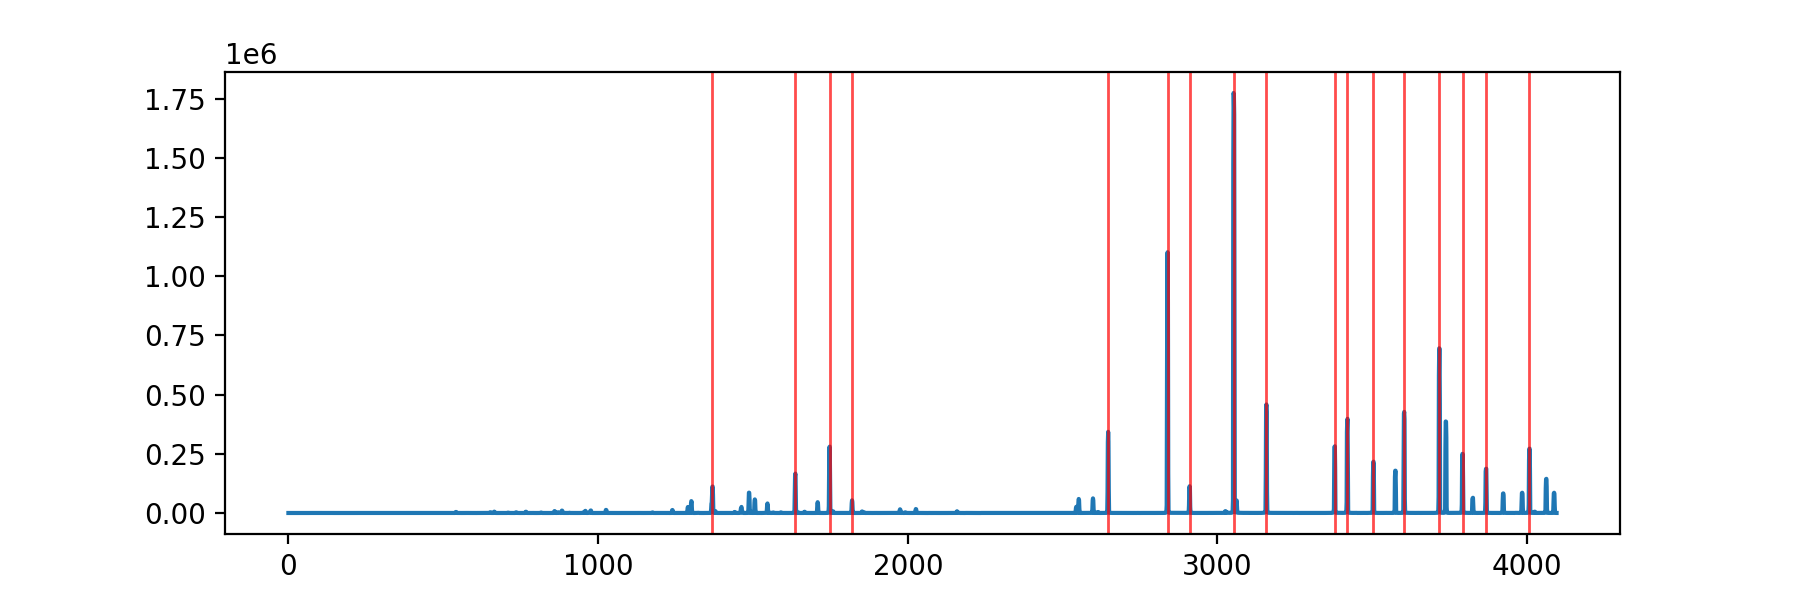

[1369.265746690618] [8780.62]
[1369.265746690618, 1636.6965118001506] [8780.62, 8495.36]
[1369.265746690618, 1636.6965118001506, 1747.3707691198927] [8780.62, 8495.36, 8377.61]
[1369.265746690618, 1636.6965118001506, 1747.3707691198927, 1820.086569840317] [8780.62, 8495.36, 8377.61, 8300.33]
[1369.265746690618, 1636.6965118001506, 1747.3707691198927, 1820.086569840317, 2647.022635851863] [8780.62, 8495.36, 8377.61, 8300.33, 7438.9]
[1369.265746690618, 1636.6965118001506, 1747.3707691198927, 1820.086569840317, 2647.022635851863, 2838.7444876991262] [8780.62, 8495.36, 8377.61, 8300.33, 7438.9, 7245.17]
[1369.265746690618, 1636.6965118001506, 1747.3707691198927, 1820.086569840317, 2647.022635851863, 2838.7444876991262, 2909.963432792516] [8780.62, 8495.36, 8377.61, 8300.33, 7438.9, 7245.17, 7173.94]
[1369.265746690618, 1636.6965118001506, 1747.3707691198927, 1820.086569840317, 2647.022635851863, 2838.7444876991262, 2909.963432792516, 3052.775889431556] [8780.62, 8495.36, 8377.61, 8300.33,

In [30]:
img_k = pk.proc('../data/Ne_Red_0.86-high.0031.fits', bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k)

In [46]:
wav_b = [8780.62, 8495.36, 8377.61, 8300.33, 7438.9, 7245.17, 7173.94, 7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6506.53, 6402.25, 6334.43, 6266.5, 6143.06]
xpl_b = [1369.265746690618, 1636.6965118001506, 1747.3707691198927, 1820.086569840317, 2647.022635851863, 2838.7444876991262, 2909.963432792516, 3052.775889431556, 3157.9016144913717, 3378.451884481013, 3419.2924219768256, 3503.5082015832077, 3602.78576933319, 3716.3892236051283, 3791.273484222873, 3867.151841737205, 4007.3903614614087]

In [47]:
lamp = np.repeat('Neon', len(wav_b))
disp = np.repeat('Red', len(wav_b))
slit = np.repeat('0.86-high', len(wav_b))

wav_big = wav_b
xpl_big = xpl_b

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


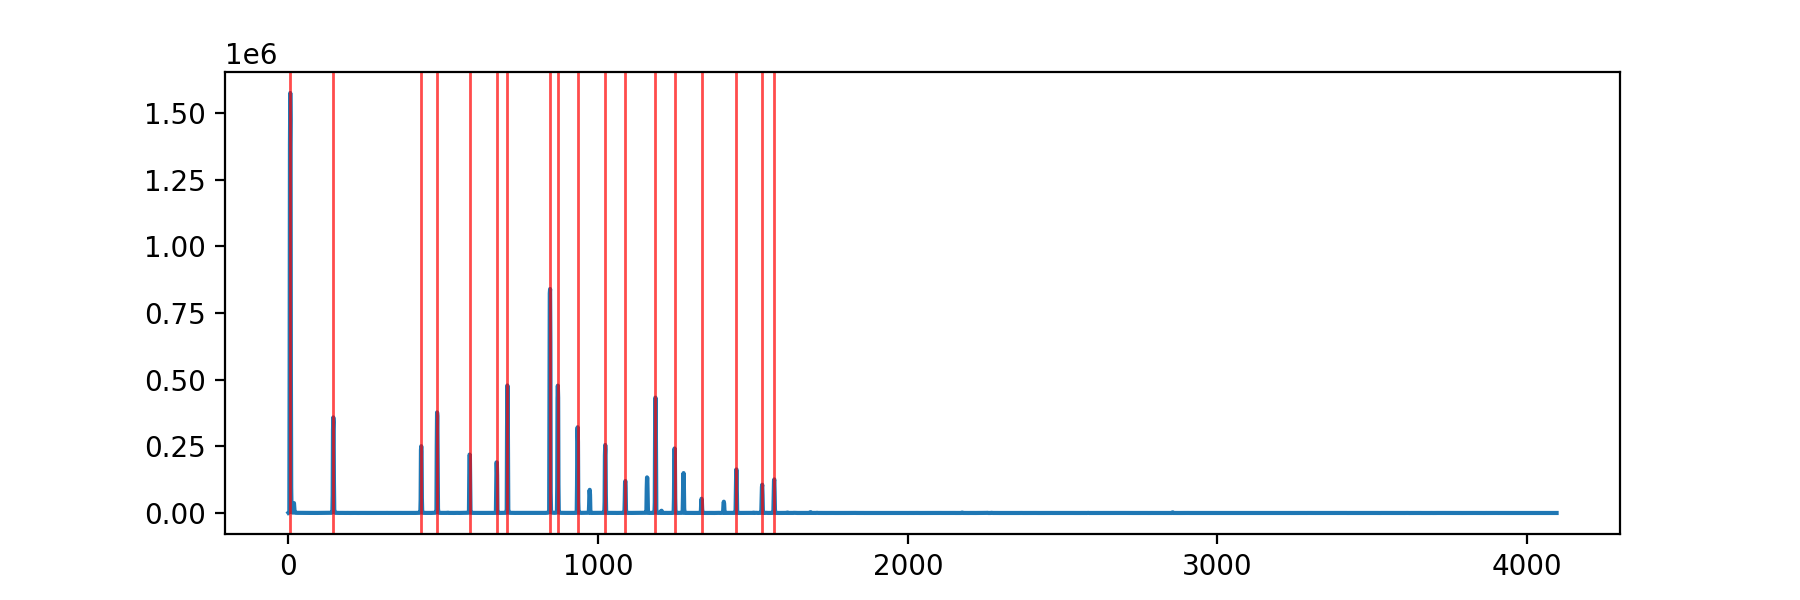

[6.038739685600345] [7032.41]
[6.038739685600345, 145.1121330049266] [7032.41, 6929.47]
[6.038739685600345, 145.1121330049266, 428.9988067212013] [7032.41, 6929.47, 6717.04]
[6.038739685600345, 145.1121330049266, 428.9988067212013, 480.43482836994644] [7032.41, 6929.47, 6717.04, 6678.28]
[6.038739685600345, 145.1121330049266, 428.9988067212013, 480.43482836994644, 585.4464733174067] [7032.41, 6929.47, 6717.04, 6678.28, 6598.95]
[6.038739685600345, 145.1121330049266, 428.9988067212013, 480.43482836994644, 585.4464733174067, 672.6886223476754] [7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6532.88]
[6.038739685600345, 145.1121330049266, 428.9988067212013, 480.43482836994644, 585.4464733174067, 672.6886223476754, 707.4171727596947] [7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6532.88, 6506.53]
[6.038739685600345, 145.1121330049266, 428.9988067212013, 480.43482836994644, 585.4464733174067, 672.6886223476754, 707.4171727596947, 844.7033532391351] [7032.41, 6929.47, 6717.04, 6678.28, 6598.95

In [34]:
img_k = pk.proc('../data/Ne_Blue_0.86-high.0026.fits', bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k)

In [48]:
lamp = np.append(lamp, np.repeat('Neon', len(wav)))
disp = np.append(disp, np.repeat('Blue', len(wav)))
slit = np.append(slit, np.repeat('0.86-high', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)


    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


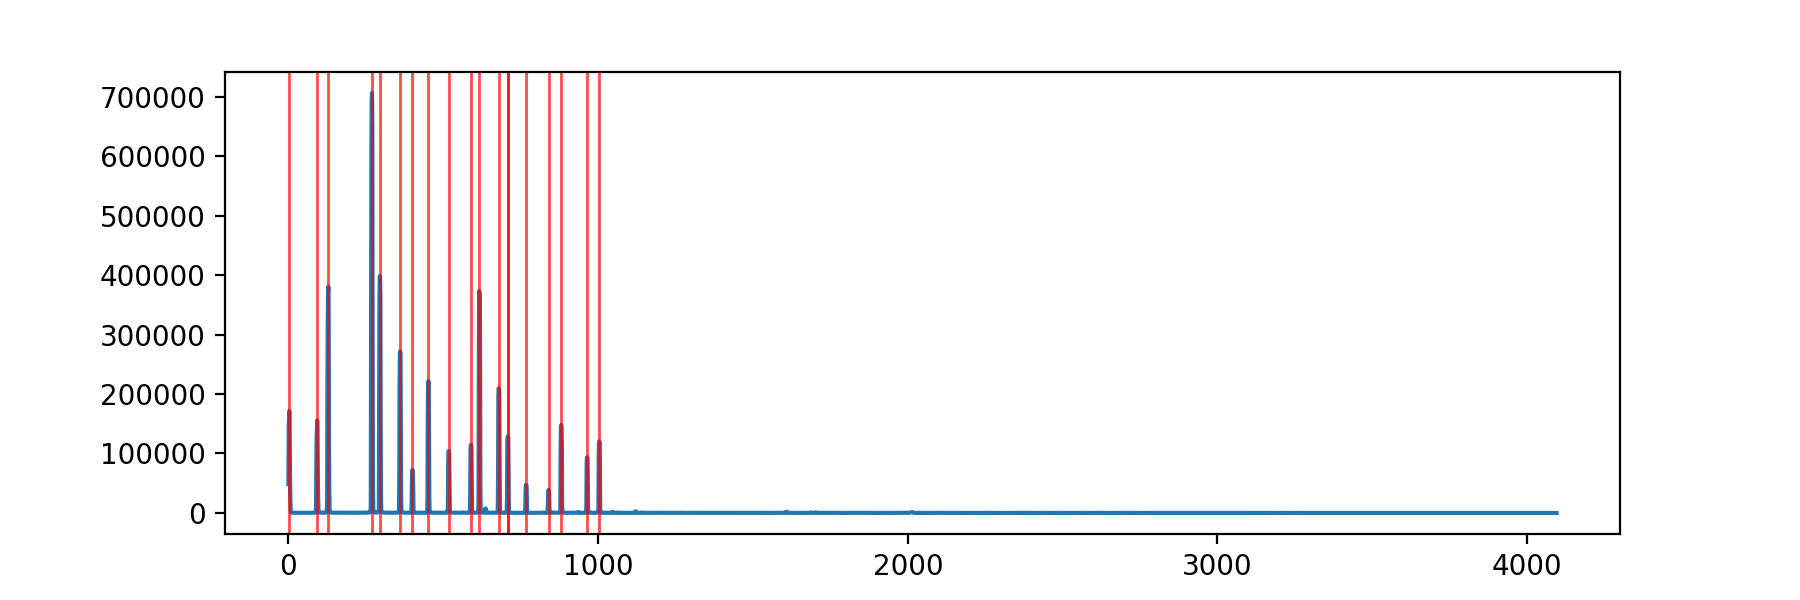

[1003.922713458538] [5852.49]
[1003.922713458538, 964.7897323759606] [5852.49, 5881.9]
[1003.922713458538, 964.7897323759606, 881.0633534903487] [5852.49, 5881.9, 5944.83]
[1003.922713458538, 964.7897323759606, 881.0633534903487, 840.2519199755818] [5852.49, 5881.9, 5944.83, 5975.53]
[1003.922713458538, 964.7897323759606, 881.0633534903487, 840.2519199755818, 767.7059360690764] [5852.49, 5881.9, 5944.83, 5975.53, 6030.0]


ValueError: could not convert string to float: '6074.34-'

[1003.922713458538, 964.7897323759606, 881.0633534903487, 840.2519199755818, 767.7059360690764, 708.6572105777333, 708.6572105777333] [5852.49, 5881.9, 5944.83, 5975.53, 6030.0, 6074.34]
[1003.922713458538, 964.7897323759606, 881.0633534903487, 840.2519199755818, 767.7059360690764, 708.6572105777333, 708.6572105777333, 708.6572105777333] [5852.49, 5881.9, 5944.83, 5975.53, 6030.0, 6074.34, 6074.34]
[1003.922713458538, 964.7897323759606, 881.0633534903487, 840.2519199755818, 767.7059360690764, 708.6572105777333, 708.6572105777333, 708.6572105777333, 679.5698069293892] [5852.49, 5881.9, 5944.83, 5975.53, 6030.0, 6074.34, 6074.34, 6096.16]
[1003.922713458538, 964.7897323759606, 881.0633534903487, 840.2519199755818, 767.7059360690764, 708.6572105777333, 708.6572105777333, 708.6572105777333, 679.5698069293892, 617.0222679796192] [5852.49, 5881.9, 5944.83, 5975.53, 6030.0, 6074.34, 6074.34, 6096.16, 6143.06]
[1003.922713458538, 964.7897323759606, 881.0633534903487, 840.2519199755818, 767.705

In [50]:
img_k = pk.proc('../data/Ne_Blue_1.18-ctr.0025.fits', bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [60]:
xpl = [1003.922713458538, 964.7897323759606, 881.0633534903487, 840.2519199755818, 767.7059360690764, 708.6572105777333, 708.6572105777333, 679.5698069293892, 617.0222679796192, 589.6093850851047, 517.8641461622695, 451.9793575260541, 400.6171876507969, 360.80763122257343, 295.46408024922295, 269.5069352560989, 128.41948509094792, 92.61009826012204, 2.641256063933042]
wav = [5852.49, 5881.9, 5944.83, 5975.53, 6030.0, 6074.34, 6074.34, 6096.16, 6143.06, 6163.59, 6217.28, 6266.5, 6304.79, 6334.43, 6382.99, 6402.45, 6506.53, 6532.88, 6598.95]

# print(len(xpl), len(wav))
# plt.plot(xpl,wav)

In [61]:
lamp = np.append(lamp, np.repeat('Neon', len(wav)))
disp = np.append(disp, np.repeat('Blue', len(wav)))
slit = np.append(slit, np.repeat('1.18-ctr', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)


    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


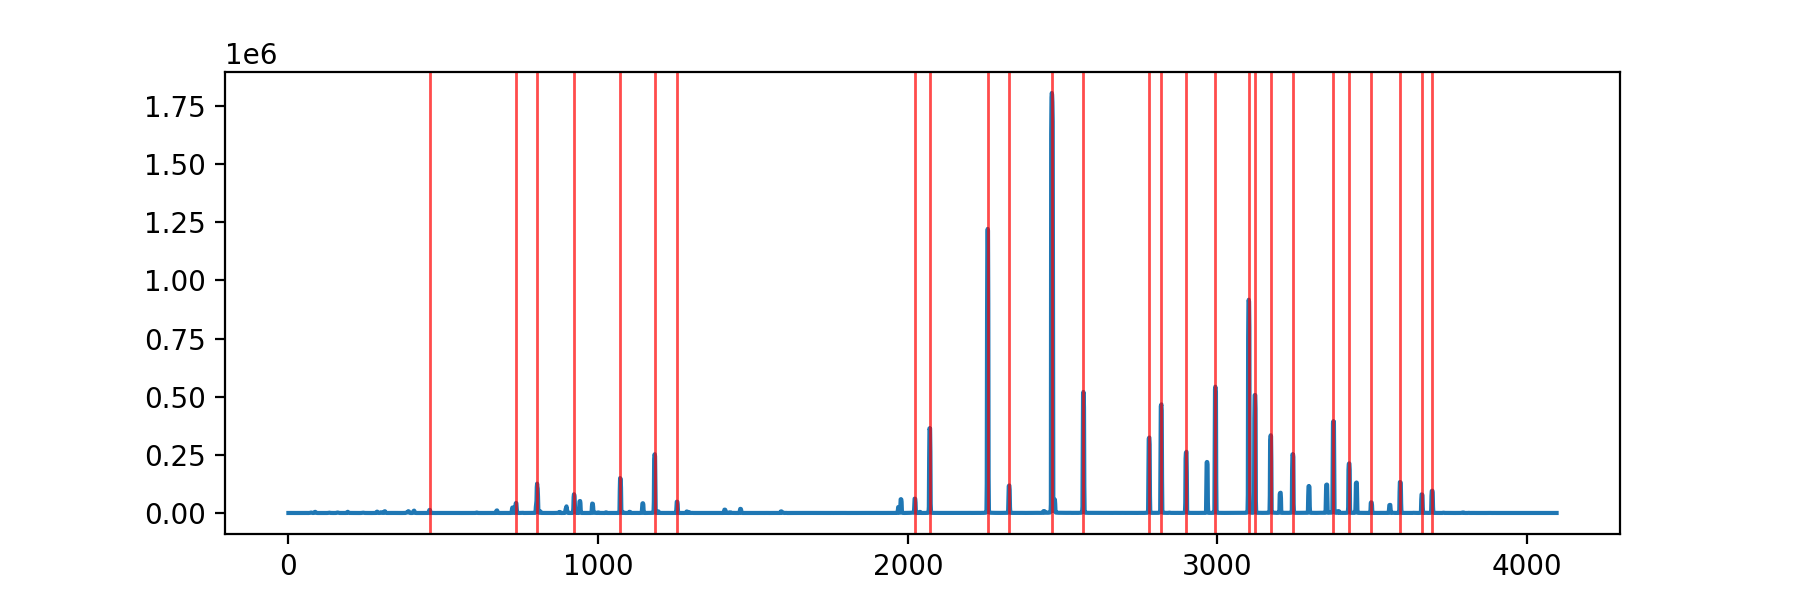

[455.85934646266924] [9148.67]
[455.85934646266924, 734.9683428606936] [9148.67, 8853.87]
[455.85934646266924, 734.9683428606936, 803.4035745485124] [9148.67, 8853.87, 8780.62]
[455.85934646266924, 734.9683428606936, 803.4035745485124, 922.6060721833882] [9148.67, 8853.87, 8780.62, 8654.38]
[455.85934646266924, 734.9683428606936, 803.4035745485124, 922.6060721833882, 1072.061854914339] [9148.67, 8853.87, 8780.62, 8654.38, 8495.36]
[455.85934646266924, 734.9683428606936, 803.4035745485124, 922.6060721833882, 1072.061854914339, 1182.6476946961066] [9148.67, 8853.87, 8780.62, 8654.38, 8495.36, 8377.61]
[455.85934646266924, 734.9683428606936, 803.4035745485124, 922.6060721833882, 1072.061854914339, 1182.6476946961066, 1255.1373752428758] [9148.67, 8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36]
[455.85934646266924, 734.9683428606936, 803.4035745485124, 922.6060721833882, 1072.061854914339, 1182.6476946961066, 1255.1373752428758, 2023.071626512969] [9148.67, 8853.87, 8780.62, 8654.38,

[455.85934646266924, 734.9683428606936, 803.4035745485124, 922.6060721833882, 1072.061854914339, 1182.6476946961066, 1255.1373752428758, 2023.071626512969, 2071.0526438269967, 2258.025434422236, 2327.268950771502, 2465.7006626514903, 2567.2530167136033, 2779.2826925939794, 2818.3861092910724, 2898.814866276236, 2993.3162829301477, 3101.0192664475576, 3121.0681199655064, 3171.747343482326, 3243.1766424329167, 3374.5057604942604, 3424.978183252868, 3496.7882265144344, 3590.302576468222] [9148.67, 8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36, 7488.87, 7438.9, 7245.17, 7173.94, 7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6506.53, 6402.25, 6382.99, 6334.43, 6266.5, 6143.06, 6096.16, 6030.0, 5944.83]
[455.85934646266924, 734.9683428606936, 803.4035745485124, 922.6060721833882, 1072.061854914339, 1182.6476946961066, 1255.1373752428758, 2023.071626512969, 2071.0526438269967, 2258.025434422236, 2327.268950771502, 2465.7006626514903, 2567.2530167136033, 2779.2826925939794, 2818.38610929

In [63]:
img_k = pk.proc('../data/Ne_Red_1.18-ctr.0032.fits', bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [65]:
lamp = np.append(lamp, np.repeat('Neon', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('1.18-ctr', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)


    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


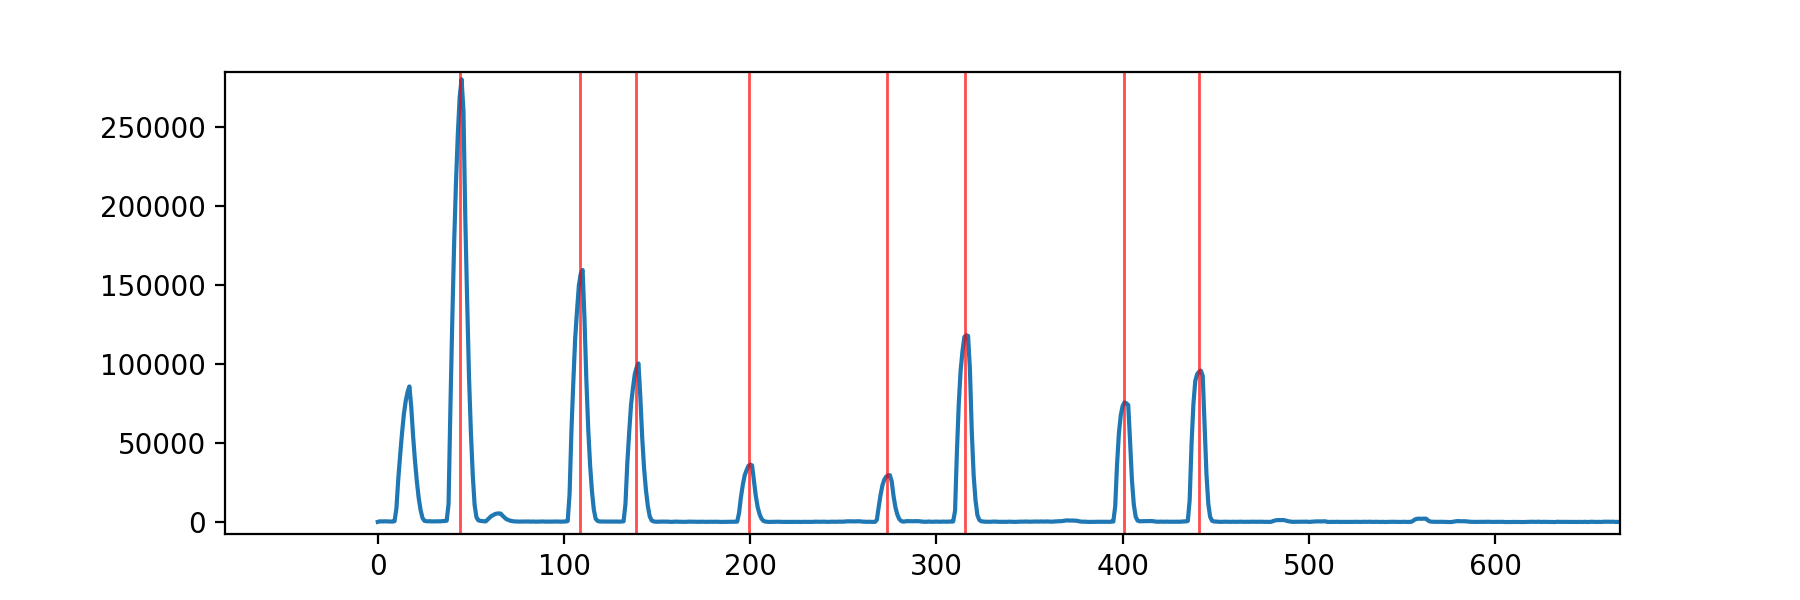

[440.782700153851] [5852.49]
[440.782700153851, 400.90314107718336] [5852.49, 5881.9]
[440.782700153851, 400.90314107718336, 315.33248863817124] [5852.49, 5881.9, 5944.83]
[440.782700153851, 400.90314107718336, 315.33248863817124, 44.261233416809965] [5852.49, 5881.9, 5944.83, 6143.06]
[440.782700153851, 400.90314107718336, 315.33248863817124, 44.261233416809965, 108.68816608489004] [5852.49, 5881.9, 5944.83, 6143.06, 6096.16]
[440.782700153851, 400.90314107718336, 315.33248863817124, 44.261233416809965, 108.68816608489004, 138.55294627800336] [5852.49, 5881.9, 5944.83, 6143.06, 6096.16, 6074.34]
[440.782700153851, 400.90314107718336, 315.33248863817124, 44.261233416809965, 108.68816608489004, 138.55294627800336, 199.22019567168647] [5852.49, 5881.9, 5944.83, 6143.06, 6096.16, 6074.34, 6030.0]
[440.782700153851, 400.90314107718336, 315.33248863817124, 44.261233416809965, 108.68816608489004, 138.55294627800336, 199.22019567168647, 273.53558762355317] [5852.49, 5881.9, 5944.83, 6143.06, 

In [67]:
img_k = pk.proc('../data/Ne_Blue_2.0-Low.0020.fits', bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k)

In [69]:
lamp = np.append(lamp, np.repeat('Neon', len(wav)))
disp = np.append(disp, np.repeat('Blue', len(wav)))
slit = np.append(slit, np.repeat('2.0-Low', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)


    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


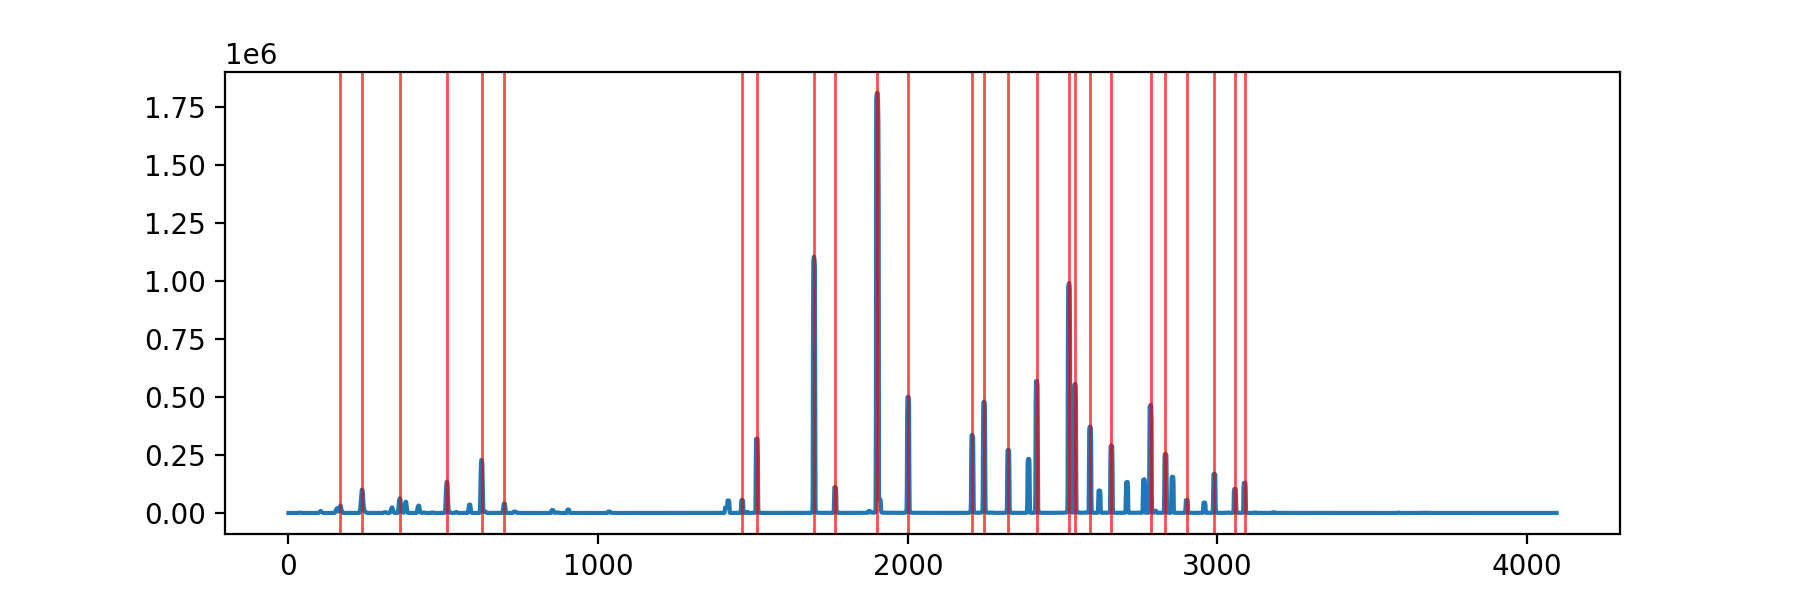

[167.7019663720257] [8853.87]
[167.7019663720257, 237.87950968228068] [8853.87, 8780.62]
[167.7019663720257, 237.87950968228068, 359.54504475569206] [8853.87, 8780.62, 8654.38]
[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309] [8853.87, 8780.62, 8654.38, 8495.36]
[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374] [8853.87, 8780.62, 8654.38, 8495.36, 8377.61]
[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923] [8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36]
[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923, 1465.1711399343462] [8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36, 7488.87]
[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923, 1465.1711399343462, 1512.5945522160007] [8853.87, 8780.62, 8654.38, 8495.

ValueError: could not convert string to float: '7245 17'

[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923, 1465.1711399343462, 1512.5945522160007, 1697.3616646421704, 1697.3616646421704] [8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36, 7488.87, 7438.9, 7245.17]
[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923, 1465.1711399343462, 1512.5945522160007, 1697.3616646421704, 1697.3616646421704, 1765.5335169159885] [8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36, 7488.87, 7438.9, 7245.17, 7173.94]
[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923, 1465.1711399343462, 1512.5945522160007, 1697.3616646421704, 1697.3616646421704, 1765.5335169159885, 1901.884322808501] [8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36, 7488.87, 7438.9, 7245.17, 7173.94, 7032.41]
[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 6

[167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923, 1465.1711399343462, 1512.5945522160007, 1697.3616646421704, 1697.3616646421704, 1765.5335169159885, 1901.884322808501, 2001.1501745740638, 2208.2595571063953, 2246.3810237450484, 2324.5331359665806, 2416.285643636628, 2520.4790357806332, 2539.8148568473953, 2588.6724736477227, 2657.3725058129494, 2783.735559204517, 2832.0784229863934, 2900.72948923312, 2989.847099538143, 3056.278261108322, 3087.859663872213] [8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36, 7488.87, 7438.9, 7245.17, 7173.94, 7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6506.53, 6402.25, 6382.99, 6334.43, 6266.5, 6143.06, 6096.16, 6030.0, 5944.83, 5881.9, 5852.49]


In [72]:
img_k = pk.proc( '../data/Ne_Red_2.0-low.0037.fits', bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [74]:
xpl = [167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923, 1465.1711399343462, 1512.5945522160007, 1697.3616646421704, 1765.5335169159885, 1901.884322808501, 2001.1501745740638, 2208.2595571063953, 2246.3810237450484, 2324.5331359665806, 2416.285643636628, 2520.4790357806332, 2539.8148568473953, 2588.6724736477227, 2657.3725058129494, 2783.735559204517, 2832.0784229863934, 2900.72948923312, 2989.847099538143, 3056.278261108322, 3087.859663872213]
wav = [8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36, 7488.87, 7438.9, 7245.17, 7173.94, 7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6506.53, 6402.25, 6382.99, 6334.43, 6266.5, 6143.06, 6096.16, 6030.0, 5944.83, 5881.9, 5852.49]

In [76]:
lamp = np.append(lamp, np.repeat('Neon', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('2.0-low', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

In [81]:
Ar = glob('../data/*Ar*.fits')
Ar

['../data/Ar_Red_2.0-low.0035.fits',
 '../data/Ar_Blue_0.86-high.0028.fits',
 '../data/Ar_Blue_1.18-ctr.0023.fits',
 '../data/Ar_Red_1.18-ctr.0034.fits',
 '../data/Ar_Red_0.86-high.0029.fits',
 '../data/Ar_Blue_2.0-Low.0022.fits']

../data/Ar_Red_2.0-low.0035.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


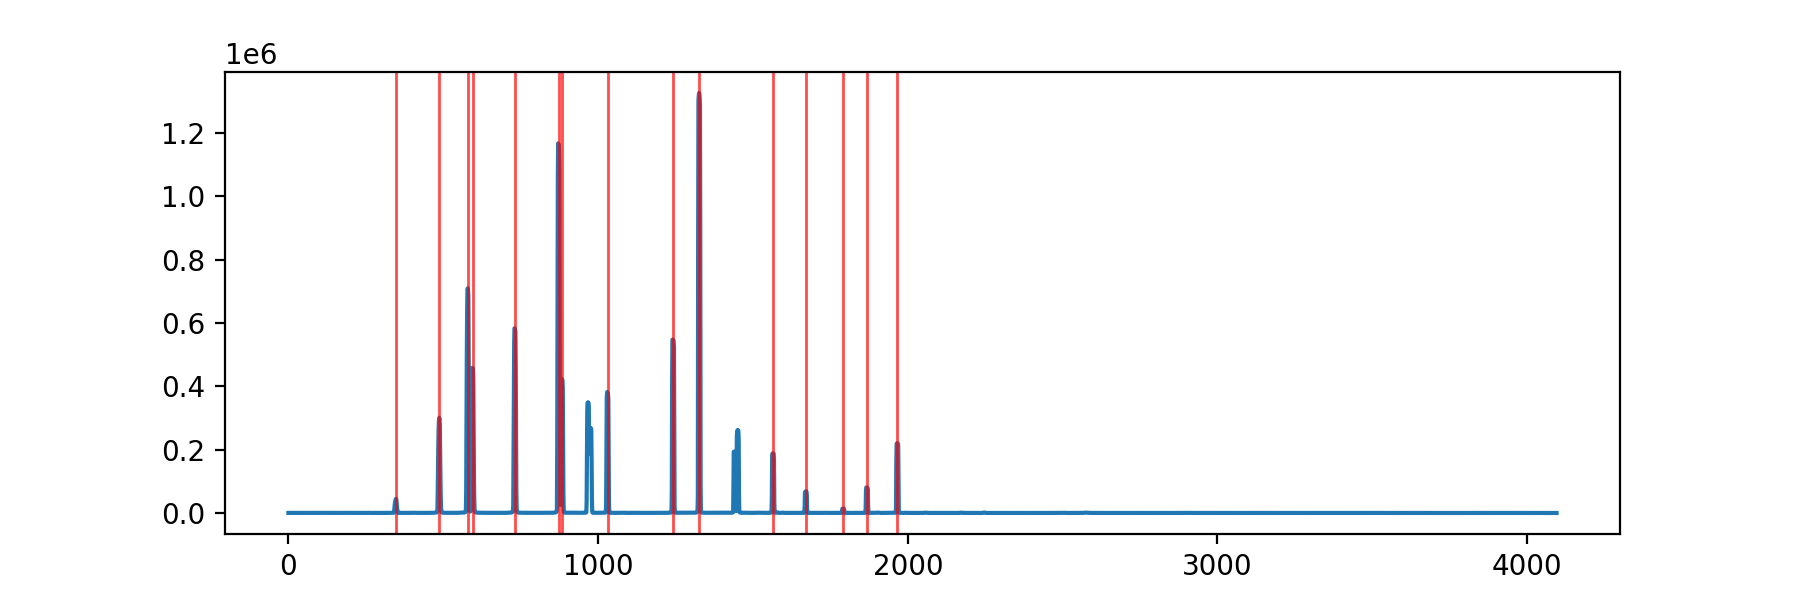

[346.6623633164447] [8667.94]
[346.6623633164447, 486.8119425724382] [8667.94, 8521.44]
[346.6623633164447, 486.8119425724382, 579.0639085562043] [8667.94, 8521.44, 8424.65]
[346.6623633164447, 486.8119425724382, 579.0639085562043, 594.6930600624137] [8667.94, 8521.44, 8424.65, 8408.21]
[346.6623633164447, 486.8119425724382, 579.0639085562043, 594.6930600624137, 731.1124921735874] [8667.94, 8521.44, 8424.65, 8408.21, 8264.52]
[346.6623633164447, 486.8119425724382, 579.0639085562043, 594.6930600624137, 731.1124921735874, 872.4635510801733] [8667.94, 8521.44, 8424.65, 8408.21, 8264.52, 8115.31]
[346.6623633164447, 486.8119425724382, 579.0639085562043, 594.6930600624137, 731.1124921735874, 872.4635510801733, 883.4317295285236] [8667.94, 8521.44, 8424.65, 8408.21, 8264.52, 8115.31, 8103.69]
[346.6623633164447, 486.8119425724382, 579.0639085562043, 594.6930600624137, 731.1124921735874, 872.4635510801733, 883.4317295285236, 1030.4607171538528] [8667.94, 8521.44, 8424.65, 8408.21, 8264.52, 81

In [82]:
k=0
print(Ar[k])
img_k = pk.proc(Ar[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [84]:
lamp = np.append(lamp, np.repeat('Ar', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('2.0-low', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Ar_Blue_0.86-high.0028.fits


/Users/james/anaconda3/lib/python3.11/site-packages/pykosmos/apextract.py:335: RuntimeWarning: invalid value encountered in sqrt
  fluxerr[i] = np.sqrt(np.nansum((onedspec[i]-skysubflux[i])) +



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


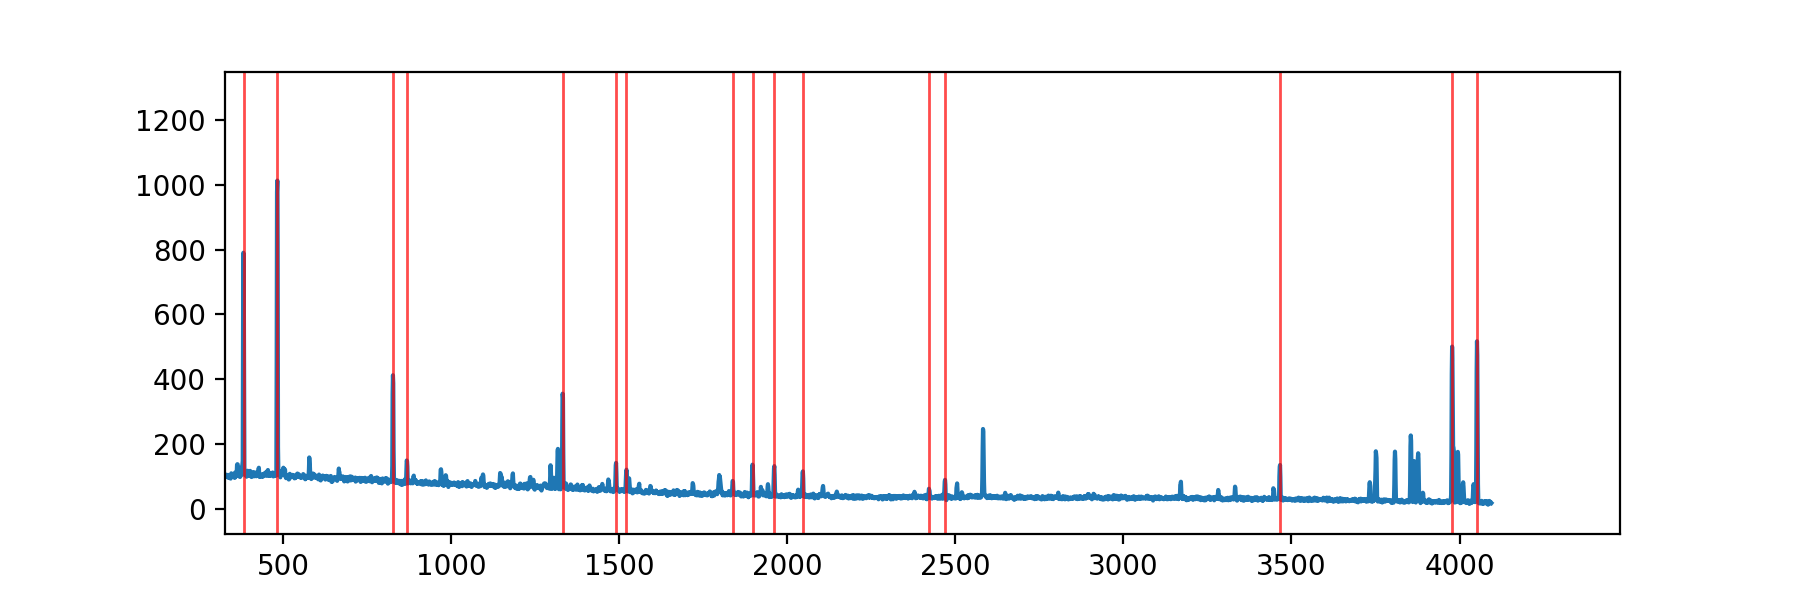

[96.68566467615727] [6965.43]
[96.68566467615727, 134.01701516869036] [6965.43, 6937.66]
[96.68566467615727, 134.01701516869036, 223.1875094987086] [6965.43, 6937.66, 6871.29]
[96.68566467615727, 134.01701516869036, 223.1875094987086, 381.33401052245034] [6965.43, 6937.66, 6871.29, 6752.83]
[96.68566467615727, 134.01701516869036, 223.1875094987086, 381.33401052245034, 481.77961852824404] [6965.43, 6937.66, 6871.29, 6752.83, 6677.28]
[96.68566467615727, 134.01701516869036, 223.1875094987086, 381.33401052245034, 481.77961852824404, 826.1265998741609] [6965.43, 6937.66, 6871.29, 6752.83, 6677.28, 6416.31]


ValueError: could not convert string to float: '6384 72'

[96.68566467615727, 134.01701516869036, 223.1875094987086, 381.33401052245034, 481.77961852824404, 826.1265998741609, 867.6447598018648, 867.6447598018648] [6965.43, 6937.66, 6871.29, 6752.83, 6677.28, 6416.31, 6384.72]
[96.68566467615727, 134.01701516869036, 223.1875094987086, 381.33401052245034, 481.77961852824404, 826.1265998741609, 867.6447598018648, 867.6447598018648, 1331.2451429611806] [6965.43, 6937.66, 6871.29, 6752.83, 6677.28, 6416.31, 6384.72, 6032.13]
[96.68566467615727, 134.01701516869036, 223.1875094987086, 381.33401052245034, 481.77961852824404, 826.1265998741609, 867.6447598018648, 867.6447598018648, 1331.2451429611806, 1489.7104864818205] [6965.43, 6937.66, 6871.29, 6752.83, 6677.28, 6416.31, 6384.72, 6032.13, 5912.09]
[96.68566467615727, 134.01701516869036, 223.1875094987086, 381.33401052245034, 481.77961852824404, 826.1265998741609, 867.6447598018648, 867.6447598018648, 1331.2451429611806, 1489.7104864818205, 1520.7513738392408] [6965.43, 6937.66, 6871.29, 6752.83, 

In [86]:
k=1
print(Ar[k])
img_k = pk.proc(Ar[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [88]:
xpl=[96.68566467615727, 134.01701516869036, 223.1875094987086, 381.33401052245034, 481.77961852824404, 826.1265998741609, 867.6447598018648, 1331.2451429611806, 1489.7104864818205, 1520.7513738392408, 1837.3042112607134, 1896.2262700996637, 1960.692102678019, 2045.6504766292503, 2421.765596016703, 2468.7442980210476, 3465.5138344894117, 4052.2020492701026, 3978.351517198157]
wav=[6965.43, 6937.66, 6871.29, 6752.83, 6677.28, 6416.31, 6384.72, 6032.13, 5912.09, 5888.58, 5650.7, 5606.73, 5558.7, 5495.87, 5187.75, 5162.29, 4510.73, 4158.59, 4200.67]

In [89]:
lamp = np.append(lamp, np.repeat('Ar', len(wav)))
disp = np.append(disp, np.repeat('Blue', len(wav)))
slit = np.append(slit, np.repeat('0.86-high', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Ar_Blue_1.18-ctr.0023.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


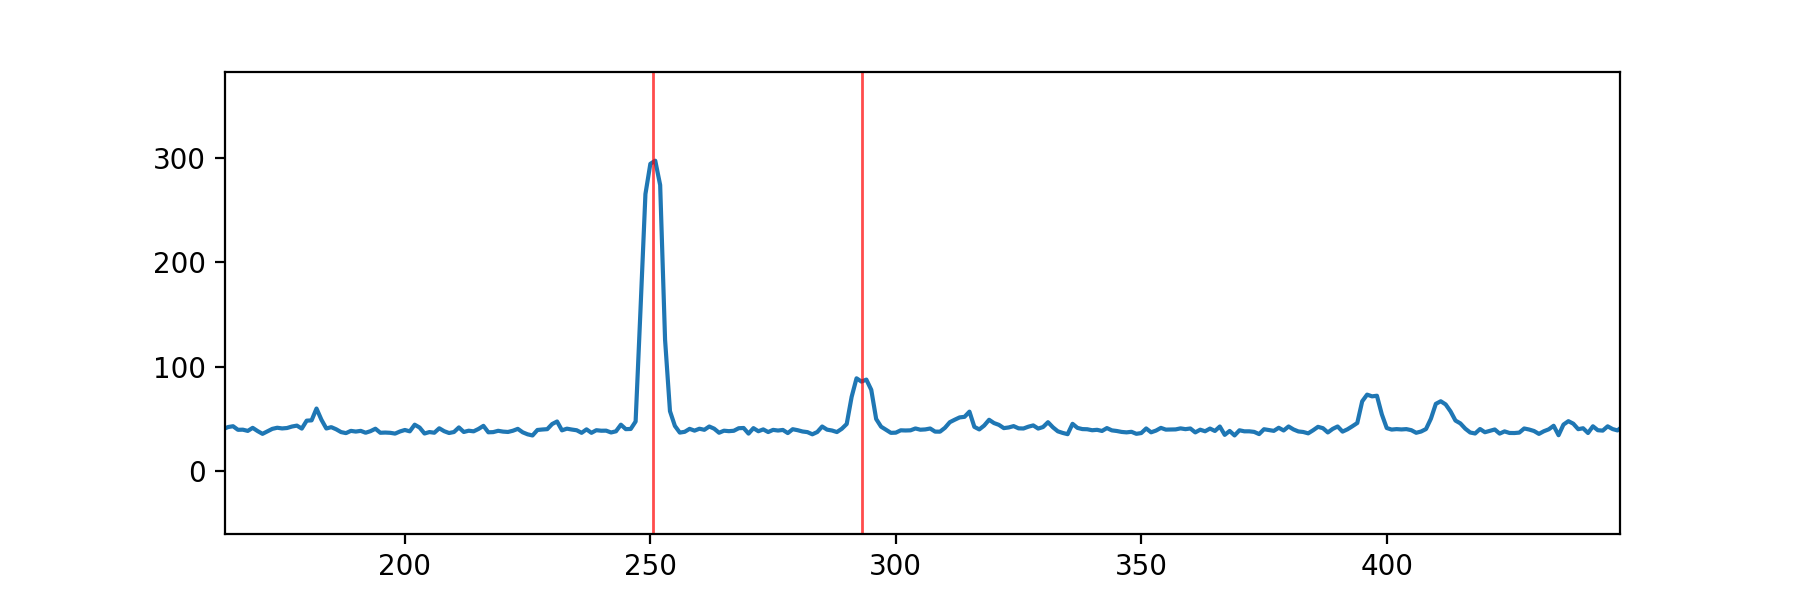

[3781.7815712993865] [3948.97]
[3781.7815712993865, 3613.753596882076] [3948.97, 4044.42]
[3781.7815712993865, 3613.753596882076, 3421.122173385306] [3948.97, 4044.42, 4158.59]
[3781.7815712993865, 3613.753596882076, 3421.122173385306, 3352.490661501013] [3948.97, 4044.42, 4158.59, 4200.67]
[3781.7815712993865, 3613.753596882076, 3421.122173385306, 3352.490661501013, 3256.961979042994] [3948.97, 4044.42, 4158.59, 4200.67, 4259.36]
[3781.7815712993865, 3613.753596882076, 3421.122173385306, 3352.490661501013, 3256.961979042994, 3236.4477602746515] [3948.97, 4044.42, 4158.59, 4200.67, 4259.36, 4272.17]
[3781.7815712993865, 3613.753596882076, 3421.122173385306, 3352.490661501013, 3256.961979042994, 3236.4477602746515, 3192.002475468613] [3948.97, 4044.42, 4158.59, 4200.67, 4259.36, 4272.17, 4300.1]
[3781.7815712993865, 3613.753596882076, 3421.122173385306, 3352.490661501013, 3256.961979042994, 3236.4477602746515, 3192.002475468613, 3138.4666439820835] [3948.97, 4044.42, 4158.59, 4200.67, 4

In [92]:
k=2
print(Ar[k])
img_k = pk.proc(Ar[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [97]:
xpl = [3781.7815712993865, 3613.753596882076, 3421.122173385306, 3352.490661501013, 3256.961979042994, 
       3236.4477602746515, 3192.002475468613, 3138.4666439820835, 2866.365235450053, 
       1898.3123455907041, 1852.1965584508812, 1480.158904217375, 1395.7757467176982, 1331.535693228278, 1272.7483795863247, 955.749761114617, 924.5694581952191, 764.7964130806877, 293.1188122563447, 250.47520183733684]
wav=[3948.97, 4044.42, 4158.59, 4200.67, 4259.36, 
     4272.17, 4300.1, 4333.56, 4510.73, 
     5162.29, 5187.75, 5495.87, 5558.7, 5606.73, 5650.7, 5888.58, 5912.09, 6032.13, 6384.72, 6416.31]


In [104]:
lamp = np.append(lamp, np.repeat('Ar', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('2.0-low', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Ar_Red_1.18-ctr.0034.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


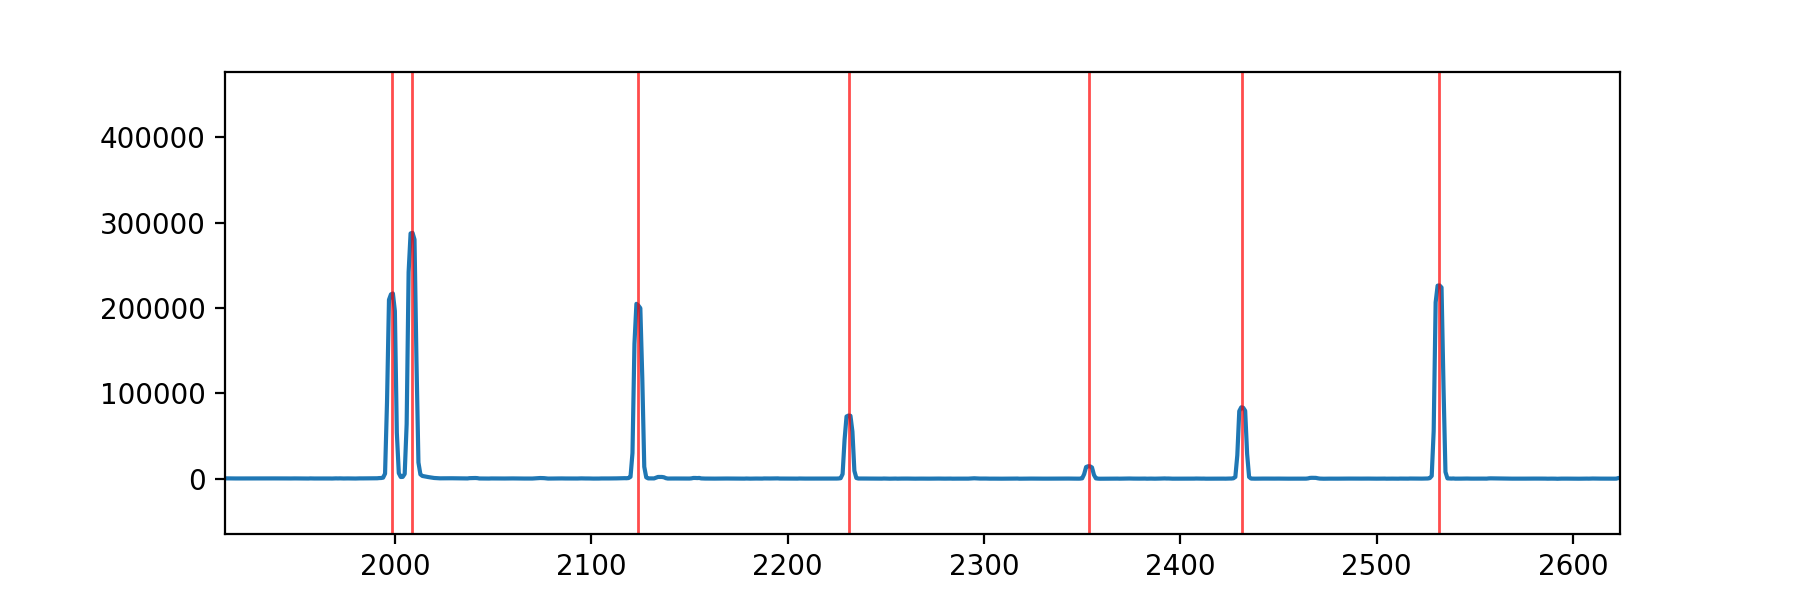

[383.6408386312211] [9224.5]
[383.6408386312211, 480.3030365789775] [9224.5, 9122.97]
[383.6408386312211, 480.3030365789775, 909.9124699551966] [9224.5, 9122.97, 8667.94]
[383.6408386312211, 480.3030365789775, 909.9124699551966, 1047.571536614095] [9224.5, 9122.97, 8667.94, 8521.44]
[383.6408386312211, 480.3030365789775, 909.9124699551966, 1047.571536614095, 1138.4281764149123] [9224.5, 9122.97, 8667.94, 8521.44, 8424.65]
[383.6408386312211, 480.3030365789775, 909.9124699551966, 1047.571536614095, 1138.4281764149123, 1153.8630743222213] [9224.5, 9122.97, 8667.94, 8521.44, 8424.65, 8408.21]
[383.6408386312211, 480.3030365789775, 909.9124699551966, 1047.571536614095, 1138.4281764149123, 1153.8630743222213, 1288.7950142819666] [9224.5, 9122.97, 8667.94, 8521.44, 8424.65, 8408.21, 8264.52]
[383.6408386312211, 480.3030365789775, 909.9124699551966, 1047.571536614095, 1138.4281764149123, 1153.8630743222213, 1288.7950142819666, 1429.0567231030543] [9224.5, 9122.97, 8667.94, 8521.44, 8424.65, 8

In [110]:
k=3
print(Ar[k])
img_k = pk.proc(Ar[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [112]:
xpl = [383.6408386312211, 480.3030365789775, 909.9124699551966, 1047.571536614095, 1138.4281764149123, 
       1153.8630743222213, 1288.7950142819666, 1429.0567231030543, 1440.0093498341855, #1523.727593618667, 
       1531.8728968776006, 1523.731168583046, 1586.5617367376342, 1798.6659007141557, 1883.3534745484292, 
       1998.387469058987, 2008.7243106690812, 2123.8412356171616, 2231.103413645528, 2353.4437718774175, 
       2431.5051631401834, 2531.671239450831]
wav = [9224.5, 9122.97, 8667.94, 8521.44, 8424.65, 
       8408.21, 8264.52, 8115.31, 8103.69, #8006.16, 
       8006.16, 8014.79, 7948.18, 7724.21, 7635.11, 
       7514.65, 7503.87, 7383.98, 7272.94, 7147.04, 
       7067.22, 6965.43]

In [113]:
lamp = np.append(lamp, np.repeat('Ar', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('1.18-ctr', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Ar_Red_0.86-high.0029.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


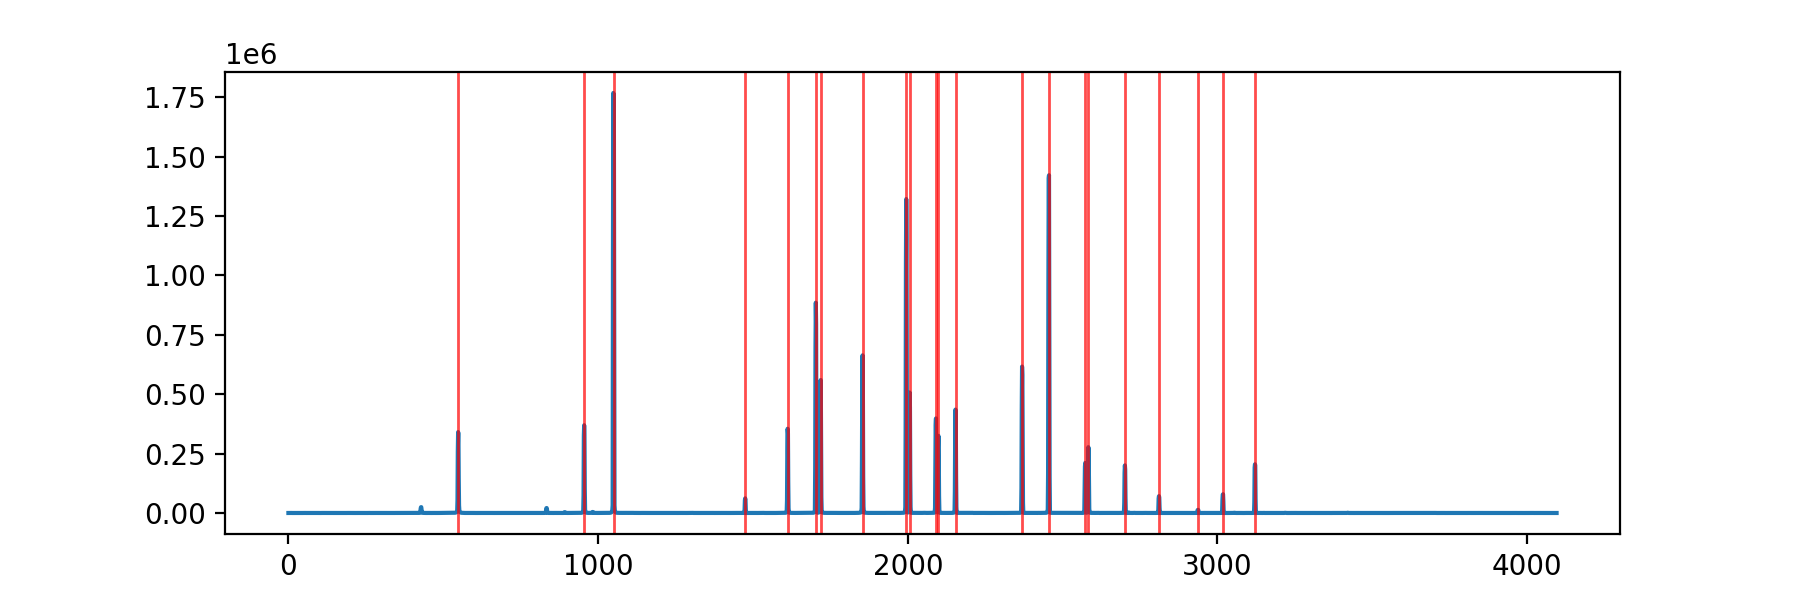

[548.2705900605222] [9657.79]
[548.2705900605222, 955.0479898138175] [9657.79, 9224.5]
[548.2705900605222, 955.0479898138175, 1049.906609404569] [9657.79, 9224.5, 9122.97]
[548.2705900605222, 955.0479898138175, 1049.906609404569, 1474.994317187814] [9657.79, 9224.5, 9122.97, 8667.94]
[548.2705900605222, 955.0479898138175, 1049.906609404569, 1474.994317187814, 1612.2278338500553] [9657.79, 9224.5, 9122.97, 8667.94, 8521.44]
[548.2705900605222, 955.0479898138175, 1049.906609404569, 1474.994317187814, 1612.2278338500553, 1703.1048272268658] [9657.79, 9224.5, 9122.97, 8667.94, 8521.44, 8424.65]
[548.2705900605222, 955.0479898138175, 1049.906609404569, 1474.994317187814, 1612.2278338500553, 1703.1048272268658, 1718.5487510448538] [9657.79, 9224.5, 9122.97, 8667.94, 8521.44, 8424.65, 8408.21]
[548.2705900605222, 955.0479898138175, 1049.906609404569, 1474.994317187814, 1612.2278338500553, 1703.1048272268658, 1718.5487510448538, 1853.9139686540427] [9657.79, 9224.5, 9122.97, 8667.94, 8521.44, 

In [121]:
k=4
print(Ar[k])
img_k = pk.proc(Ar[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [122]:
lamp = np.append(lamp, np.repeat('Ar', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('0.86-high', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Ar_Blue_2.0-Low.0022.fits


/Users/james/anaconda3/lib/python3.11/site-packages/pykosmos/apextract.py:335: RuntimeWarning: invalid value encountered in sqrt
  fluxerr[i] = np.sqrt(np.nansum((onedspec[i]-skysubflux[i])) +



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


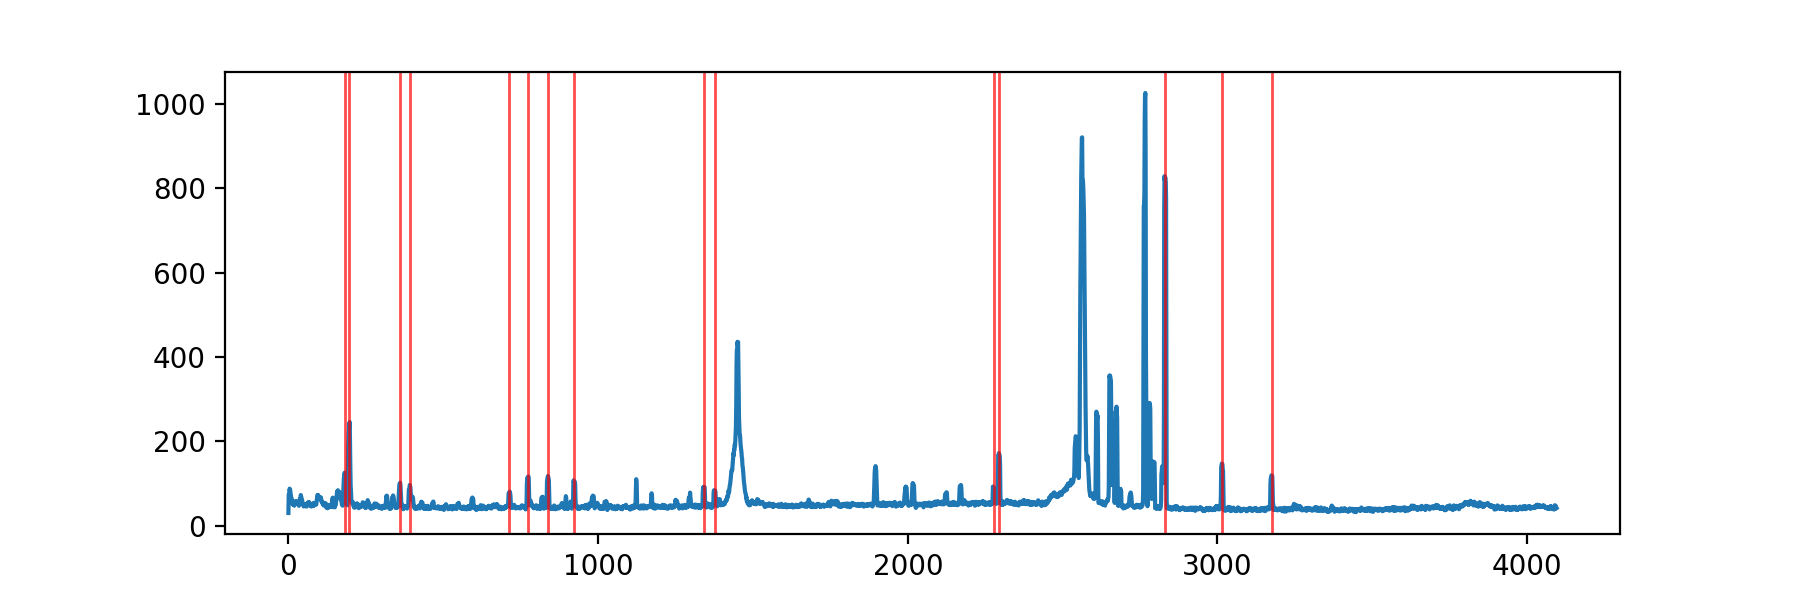

[181.200050994251] [6043.22]
[181.200050994251, 196.18192846342973] [6043.22, 6032.13]
[181.200050994251, 196.18192846342973, 359.8489704060263] [6043.22, 6032.13, 5912.09]
[181.200050994251, 196.18192846342973, 359.8489704060263, 392.1385520445791] [6043.22, 6032.13, 5912.09, 5888.58]
[181.200050994251, 196.18192846342973, 359.8489704060263, 392.1385520445791, 713.8472906795756] [6043.22, 6032.13, 5912.09, 5888.58, 5650.7]
[181.200050994251, 196.18192846342973, 359.8489704060263, 392.1385520445791, 713.8472906795756, 773.2857816404423] [6043.22, 6032.13, 5912.09, 5888.58, 5650.7, 5606.73]
[181.200050994251, 196.18192846342973, 359.8489704060263, 392.1385520445791, 713.8472906795756, 773.2857816404423, 838.118602211694] [6043.22, 6032.13, 5912.09, 5888.58, 5650.7, 5606.73, 5558.7]
[181.200050994251, 196.18192846342973, 359.8489704060263, 392.1385520445791, 713.8472906795756, 773.2857816404423, 838.118602211694, 923.0939582029338] [6043.22, 6032.13, 5912.09, 5888.58, 5650.7, 5606.73, 55

In [128]:
k=5
print(Ar[k])
img_k = pk.proc(Ar[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [129]:
lamp = np.append(lamp, np.repeat('Ar', len(wav)))
disp = np.append(disp, np.repeat('Blue', len(wav)))
slit = np.append(slit, np.repeat('2.0-Low', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

In [132]:
Kr = glob('../data/*Kr*.fits')
Kr

['../data/Kr_Red_1.18-ctr.0033.fits',
 '../data/Kr_Blue_0.86-high.0027.fits',
 '../data/Kr_Red_0.86-high.0030.fits',
 '../data/Kr_Blue_2.0-Low.0021.fits',
 '../data/Kr_Red_2.0-low.0036.fits',
 '../data/Kr_Blue_1.18-ctr.0024.fits']

../data/Kr_Red_1.18-ctr.0033.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


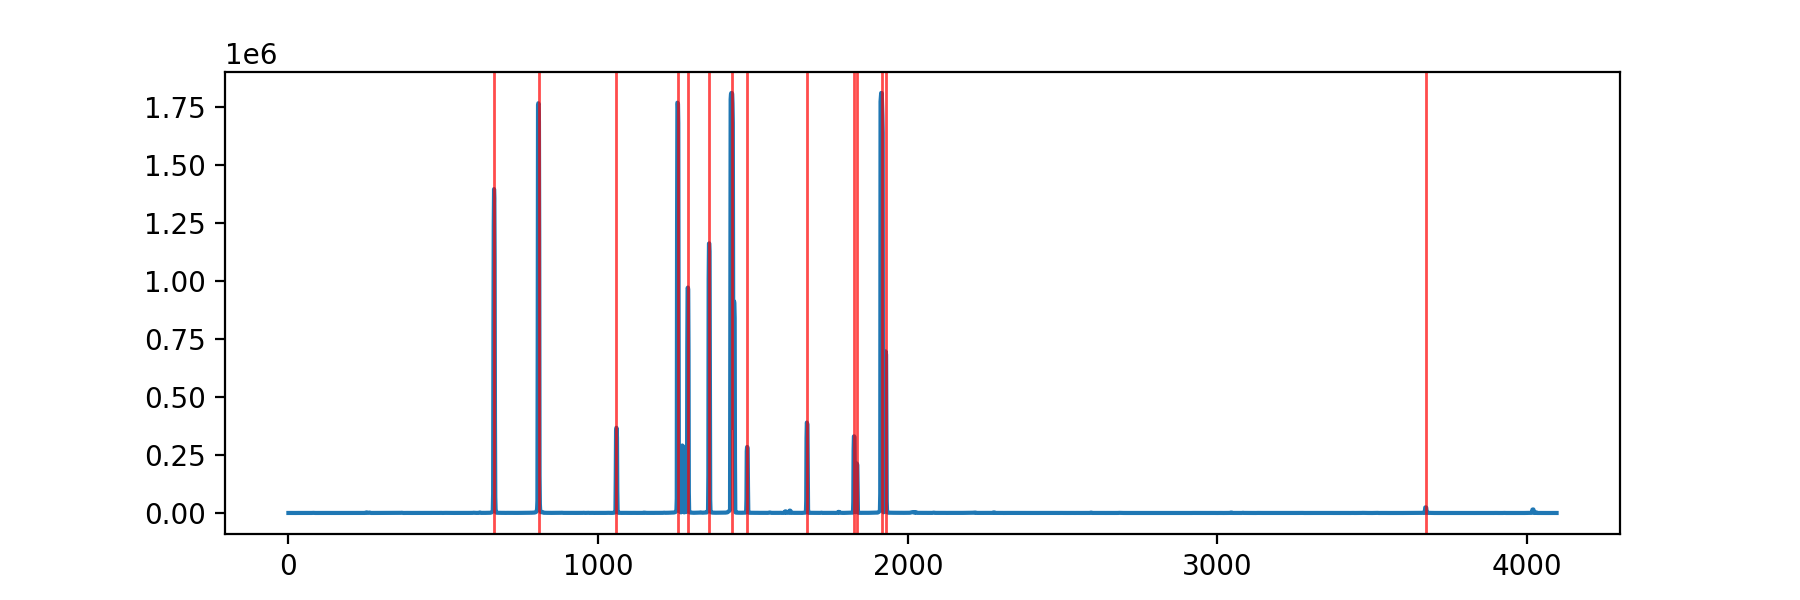

[3672.502928161673] [5870.92]
[3672.502928161673, 1928.8419329569124] [5870.92, 7587.41]
[3672.502928161673, 1928.8419329569124, 1915.4333478863143] [5870.92, 7587.41, 7601.55]
[3672.502928161673, 1928.8419329569124, 1915.4333478863143, 1835.6400039003186] [5870.92, 7587.41, 7601.55, 7685.25]
[3672.502928161673, 1928.8419329569124, 1915.4333478863143, 1835.6400039003186, 1826.7931009267284] [5870.92, 7587.41, 7601.55, 7685.25, 7694.54]
[3672.502928161673, 1928.8419329569124, 1915.4333478863143, 1835.6400039003186, 1826.7931009267284, 1674.7908226476752] [5870.92, 7587.41, 7601.55, 7685.25, 7694.54, 7854.82]
[3672.502928161673, 1928.8419329569124, 1915.4333478863143, 1835.6400039003186, 1826.7931009267284, 1674.7908226476752, 1481.6166501700575] [5870.92, 7587.41, 7601.55, 7685.25, 7694.54, 7854.82, 8059.5]
[3672.502928161673, 1928.8419329569124, 1915.4333478863143, 1835.6400039003186, 1826.7931009267284, 1674.7908226476752, 1481.6166501700575, 1430.8512922118866] [5870.92, 7587.41, 760

In [133]:
k=0
print(Kr[k])
img_k = pk.proc(Kr[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [134]:
lamp = np.append(lamp, np.repeat('Kr', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('1.18-ctr', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Kr_Blue_0.86-high.0027.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


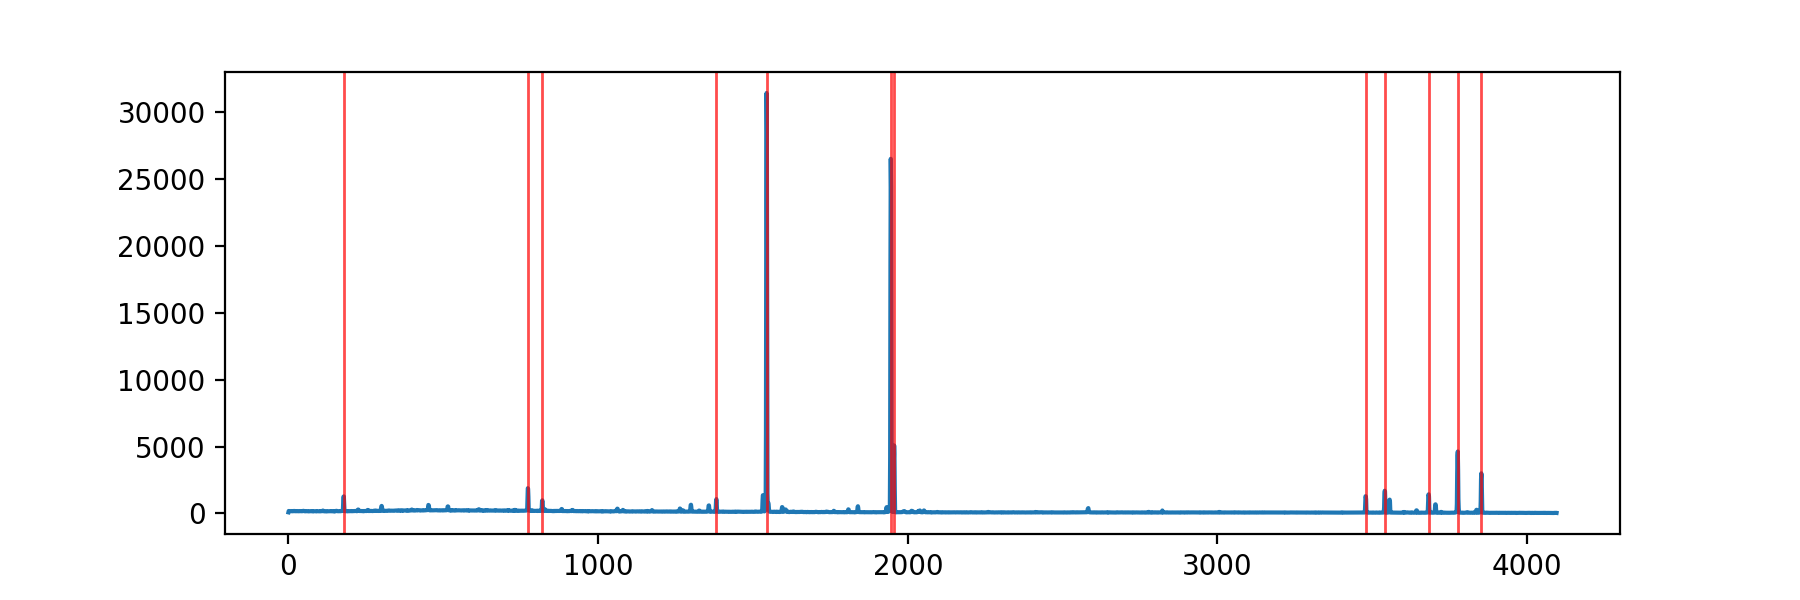

[178.41455838883726] [6904.68]
[178.41455838883726, 773.5309438107427] [6904.68, 6456.29]
[178.41455838883726, 773.5309438107427, 819.9246748246702] [6904.68, 6456.29, 6421.03]
[178.41455838883726, 773.5309438107427, 819.9246748246702, 1381.7801472301105] [6904.68, 6456.29, 6421.03, 5993.85]
[178.41455838883726, 773.5309438107427, 819.9246748246702, 1381.7801472301105, 1544.202475568104] [6904.68, 6456.29, 6421.03, 5993.85, 5870.92]
[178.41455838883726, 773.5309438107427, 819.9246748246702, 1381.7801472301105, 1544.202475568104, 1945.2721867397604] [6904.68, 6456.29, 6421.03, 5993.85, 5870.92, 5570.29]
[178.41455838883726, 773.5309438107427, 819.9246748246702, 1381.7801472301105, 1544.202475568104, 1945.2721867397604, 1956.1353183635251] [6904.68, 6456.29, 6421.03, 5993.85, 5870.92, 5570.29, 5562.23]
[178.41455838883726, 773.5309438107427, 819.9246748246702, 1381.7801472301105, 1544.202475568104, 1945.2721867397604, 1956.1353183635251, 3478.6919550438306] [6904.68, 6456.29, 6421.03, 59

In [136]:
k=1
print(Kr[k])
img_k = pk.proc(Kr[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [137]:
lamp = np.append(lamp, np.repeat('Kr', len(wav)))
disp = np.append(disp, np.repeat('Blue', len(wav)))
slit = np.append(slit, np.repeat('0.86-high', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Kr_Red_0.86-high.0030.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


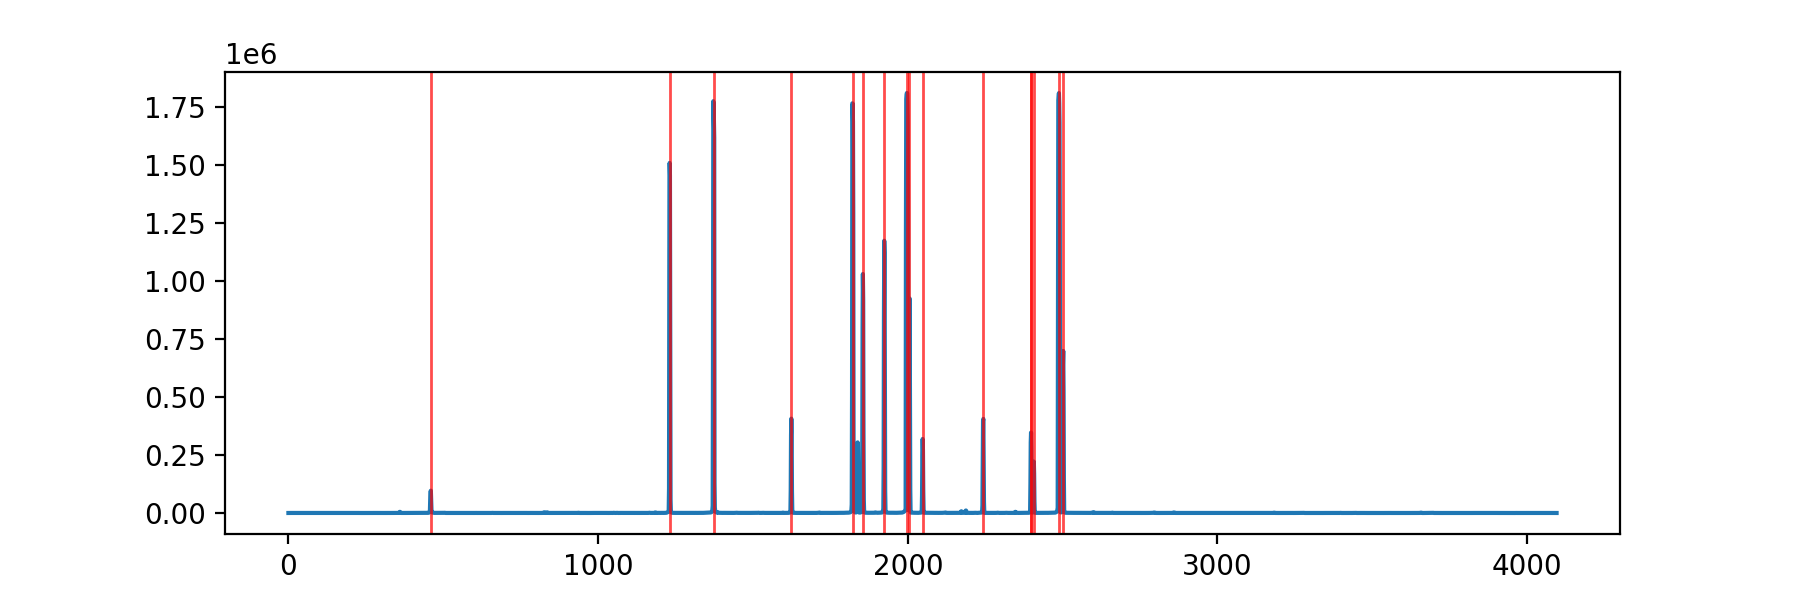

[459.4097795376078] [9751.76]
[459.4097795376078, 1231.316752302804] [9751.76, 8928.69]
[459.4097795376078, 1231.316752302804, 1373.2918312223062] [9751.76, 8928.69, 8776.75]
[459.4097795376078, 1231.316752302804, 1373.2918312223062, 1624.0204212699266] [9751.76, 8928.69, 8776.75, 8508.87]


ValueError: could not convert string to float: '8298 11'

[459.4097795376078, 1231.316752302804, 1373.2918312223062, 1624.0204212699266, 1822.243001969475, 1822.243001969475] [9751.76, 8928.69, 8776.75, 8508.87, 8298.11]
[459.4097795376078, 1231.316752302804, 1373.2918312223062, 1624.0204212699266, 1822.243001969475, 1822.243001969475, 1855.1252707642936] [9751.76, 8928.69, 8776.75, 8508.87, 8298.11, 8263.24]
[459.4097795376078, 1231.316752302804, 1373.2918312223062, 1624.0204212699266, 1822.243001969475, 1822.243001969475, 1855.1252707642936, 1924.2814919682146] [9751.76, 8928.69, 8776.75, 8508.87, 8298.11, 8263.24, 8190.06]
[459.4097795376078, 1231.316752302804, 1373.2918312223062, 1624.0204212699266, 1822.243001969475, 1822.243001969475, 1855.1252707642936, 1924.2814919682146, 1997.638618965186] [9751.76, 8928.69, 8776.75, 8508.87, 8298.11, 8263.24, 8190.06, 8112.9]
[459.4097795376078, 1231.316752302804, 1373.2918312223062, 1624.0204212699266, 1822.243001969475, 1822.243001969475, 1855.1252707642936, 1924.2814919682146, 1997.638618965186, 

In [138]:
k=2
print(Kr[k])
img_k = pk.proc(Kr[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [140]:
xpl = [459.4097795376078, 1231.316752302804, 1373.2918312223062, 1624.0204212699266,  
       1822.243001969475, 1855.1252707642936, 1924.2814919682146, 1997.638618965186, 2005.4634281195235, 
       2048.0816197169042, 2243.502665828309, 2397.8759129311484, 2406.866428124308, 
       2488.0318082306208, 2501.8019411807386]
wav = [9751.76, 8928.69, 8776.75, 8508.87, 8298.11, 
       8263.24, 8190.06, 8112.9, 8104.37, 8059.5, 
       7854.82, 7694.54, 7685.25, 7601.55, 
       7587.41]

In [141]:
lamp = np.append(lamp, np.repeat('Kr', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('0.86-high', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Kr_Blue_2.0-Low.0021.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


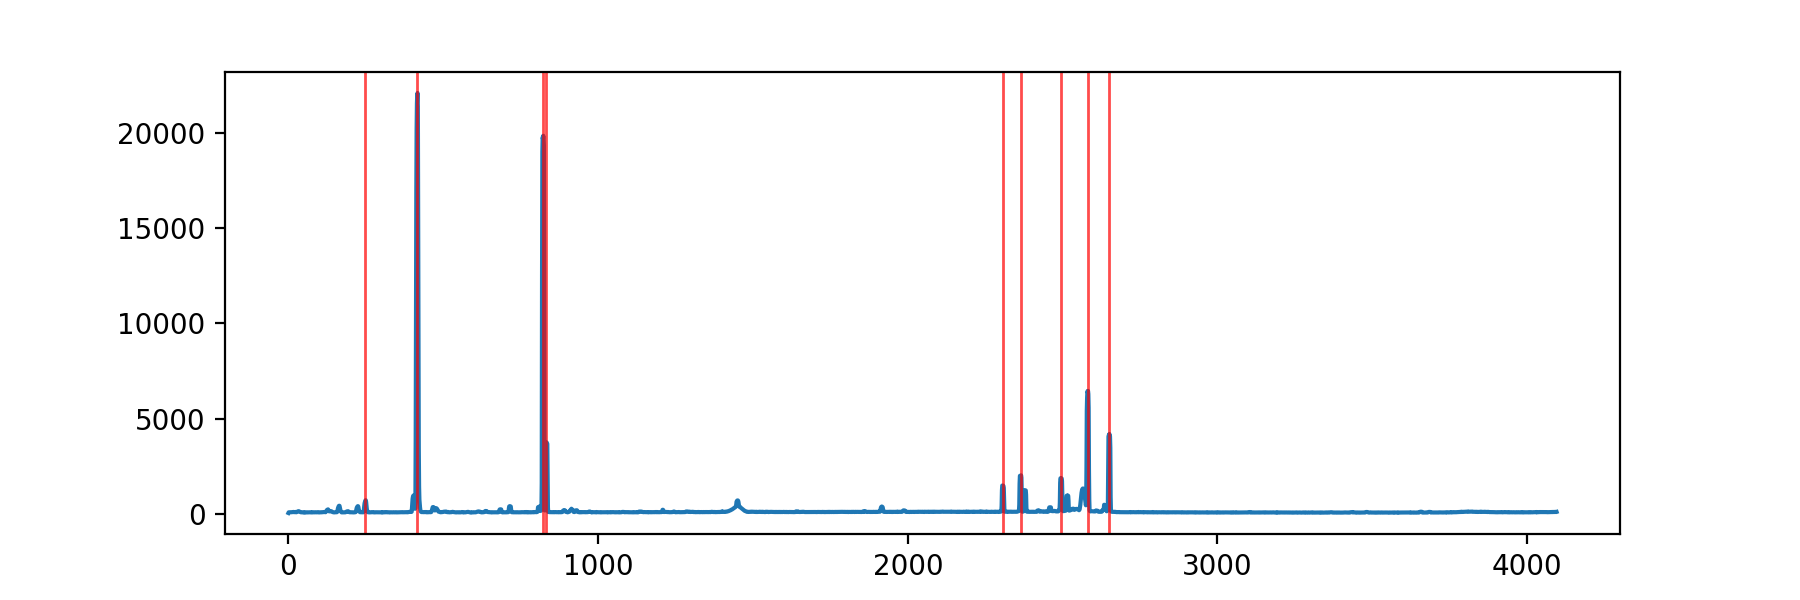

[248.59774497350236] [5993.85]
[248.59774497350236, 415.8295928388728] [5993.85, 5870.92]
[248.59774497350236, 415.8295928388728, 822.6680107306217] [5993.85, 5870.92, 5570.29]
[248.59774497350236, 415.8295928388728, 822.6680107306217, 833.2205225738837] [5993.85, 5870.92, 5570.29, 5562.23]
[248.59774497350236, 415.8295928388728, 822.6680107306217, 833.2205225738837, 2307.468094394431] [5993.85, 5870.92, 5570.29, 5562.23, 4502.35]
[248.59774497350236, 415.8295928388728, 822.6680107306217, 833.2205225738837, 2307.468094394431, 2364.3258101409715] [5993.85, 5870.92, 5570.29, 5562.23, 4502.35, 4463.69]
[248.59774497350236, 415.8295928388728, 822.6680107306217, 833.2205225738837, 2307.468094394431, 2364.3258101409715, 2495.1090342048224] [5993.85, 5870.92, 5570.29, 5562.23, 4502.35, 4463.69, 4376.12]
[248.59774497350236, 415.8295928388728, 822.6680107306217, 833.2205225738837, 2307.468094394431, 2364.3258101409715, 2495.1090342048224, 2580.780047181377] [5993.85, 5870.92, 5570.29, 5562.23,

In [144]:
k=3
print(Kr[k])
img_k = pk.proc(Kr[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [145]:
lamp = np.append(lamp, np.repeat('Kr', len(wav)))
disp = np.append(disp, np.repeat('Blue', len(wav)))
slit = np.append(slit, np.repeat('2.0-Low', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Kr_Red_2.0-low.0036.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


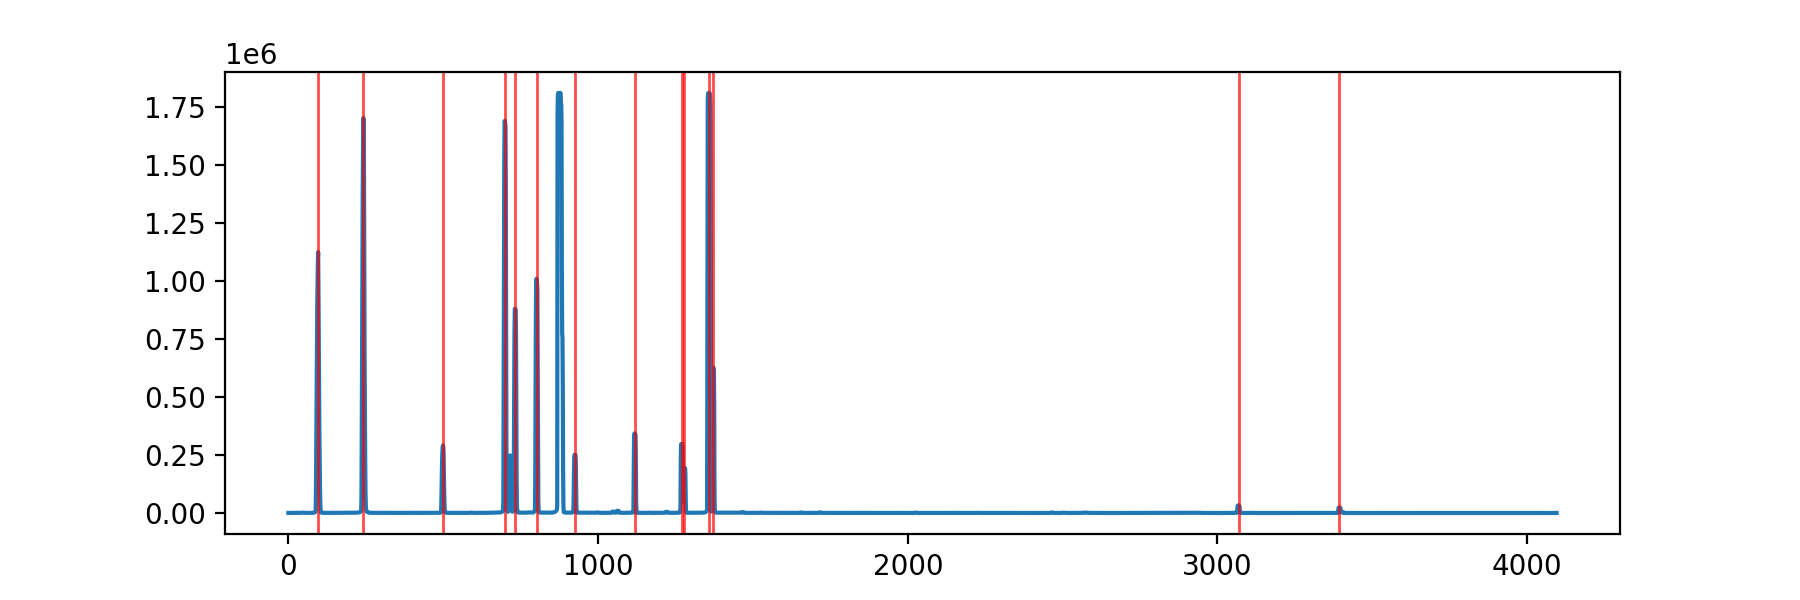

[3393.940155642712] [5570.29]
[3393.940155642712, 3067.891105896595] [5570.29, 5870.92]
[3393.940155642712, 3067.891105896595, 1371.283324165656] [5570.29, 5870.92, 7587.41]
[3393.940155642712, 3067.891105896595, 1371.283324165656, 1357.4783528062565] [5570.29, 5870.92, 7587.41, 7601.55]
[3393.940155642712, 3067.891105896595, 1371.283324165656, 1357.4783528062565, 1278.9642811541792] [5570.29, 5870.92, 7587.41, 7601.55, 7685.25]
[3393.940155642712, 3067.891105896595, 1371.283324165656, 1357.4783528062565, 1278.9642811541792, 1270.6150184686219] [5570.29, 5870.92, 7587.41, 7601.55, 7685.25, 7694.54]
[3393.940155642712, 3067.891105896595, 1371.283324165656, 1357.4783528062565, 1278.9642811541792, 1270.6150184686219, 1118.6605596005688] [5570.29, 5870.92, 7587.41, 7601.55, 7685.25, 7694.54, 7584.82]
[3393.940155642712, 3067.891105896595, 1371.283324165656, 1357.4783528062565, 1278.9642811541792, 1270.6150184686219, 1118.6605596005688, 925.2250057441711] [5570.29, 5870.92, 7587.41, 7601.55

In [146]:
k=4
print(Kr[k])
img_k = pk.proc(Kr[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [147]:
lamp = np.append(lamp, np.repeat('Kr', len(wav)))
disp = np.append(disp, np.repeat('Red', len(wav)))
slit = np.append(slit, np.repeat('2.0-Low', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

../data/Kr_Blue_1.18-ctr.0024.fits



    Instructions:
    ------------
    0) For proper interactive widgets, ensure you're using the Notebook backend
    in the Jupyter notebook, e.g.:
        %matplotlib notebook
    1) Click on arc-line features (peaks) in the plot. The Pixel Value box should update.
    2) Enter the known wavelength of the feature in the Wavelength box.
    3) Click the Assign button, a red line will be drawn marking the feature.
    4) When you've identified all your lines, stop the interaction for (or close) the figure.


<IPython.core.display.Javascript object>


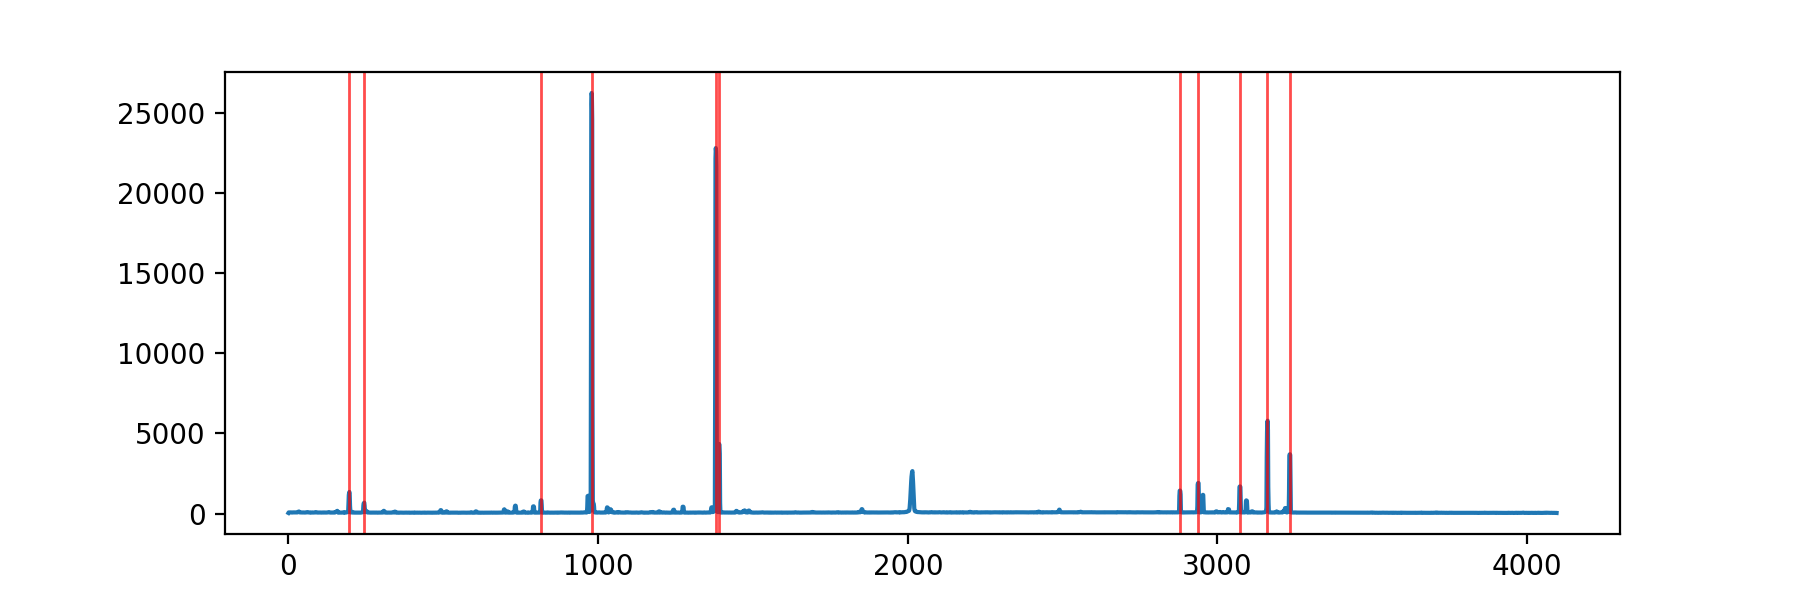

[196.43150875719212] [6456.29]
[196.43150875719212, 244.07708687678658] [6456.29, 6421.03]
[196.43150875719212, 244.07708687678658, 815.8521637687858] [6456.29, 6421.03, 5993.85]
[196.43150875719212, 244.07708687678658, 815.8521637687858, 979.4194331652304] [6456.29, 6421.03, 5993.85, 5870.92]
[196.43150875719212, 244.07708687678658, 815.8521637687858, 979.4194331652304, 1380.437087174511] [6456.29, 6421.03, 5993.85, 5870.92, 5570.29]
[196.43150875719212, 244.07708687678658, 815.8521637687858, 979.4194331652304, 1380.437087174511, 1391.2530885770625] [6456.29, 6421.03, 5993.85, 5870.92, 5570.29, 5562.23]
[196.43150875719212, 244.07708687678658, 815.8521637687858, 979.4194331652304, 1380.437087174511, 1391.2530885770625, 2879.0171794615353] [6456.29, 6421.03, 5993.85, 5870.92, 5570.29, 5562.23, 4502.35]
[196.43150875719212, 244.07708687678658, 815.8521637687858, 979.4194331652304, 1380.437087174511, 1391.2530885770625, 2879.0171794615353, 2937.7093787104886] [6456.29, 6421.03, 5993.85, 

In [150]:
k=5
print(Kr[k])
img_k = pk.proc(Kr[k], bias=bias, trim=False, Waxis=0)
ex_k, _ = pk.BoxcarExtract(img_k, trace, apwidth=3, Waxis=0)
xpl,wav = pk.identify_widget(ex_k) 

In [151]:
lamp = np.append(lamp, np.repeat('Kr', len(wav)))
disp = np.append(disp, np.repeat('Blue', len(wav)))
slit = np.append(slit, np.repeat('1.18-ctr', len(wav)))

wav_big = np.append(wav_big, wav)
xpl_big = np.append(xpl_big, xpl)

<IPython.core.display.Javascript object>


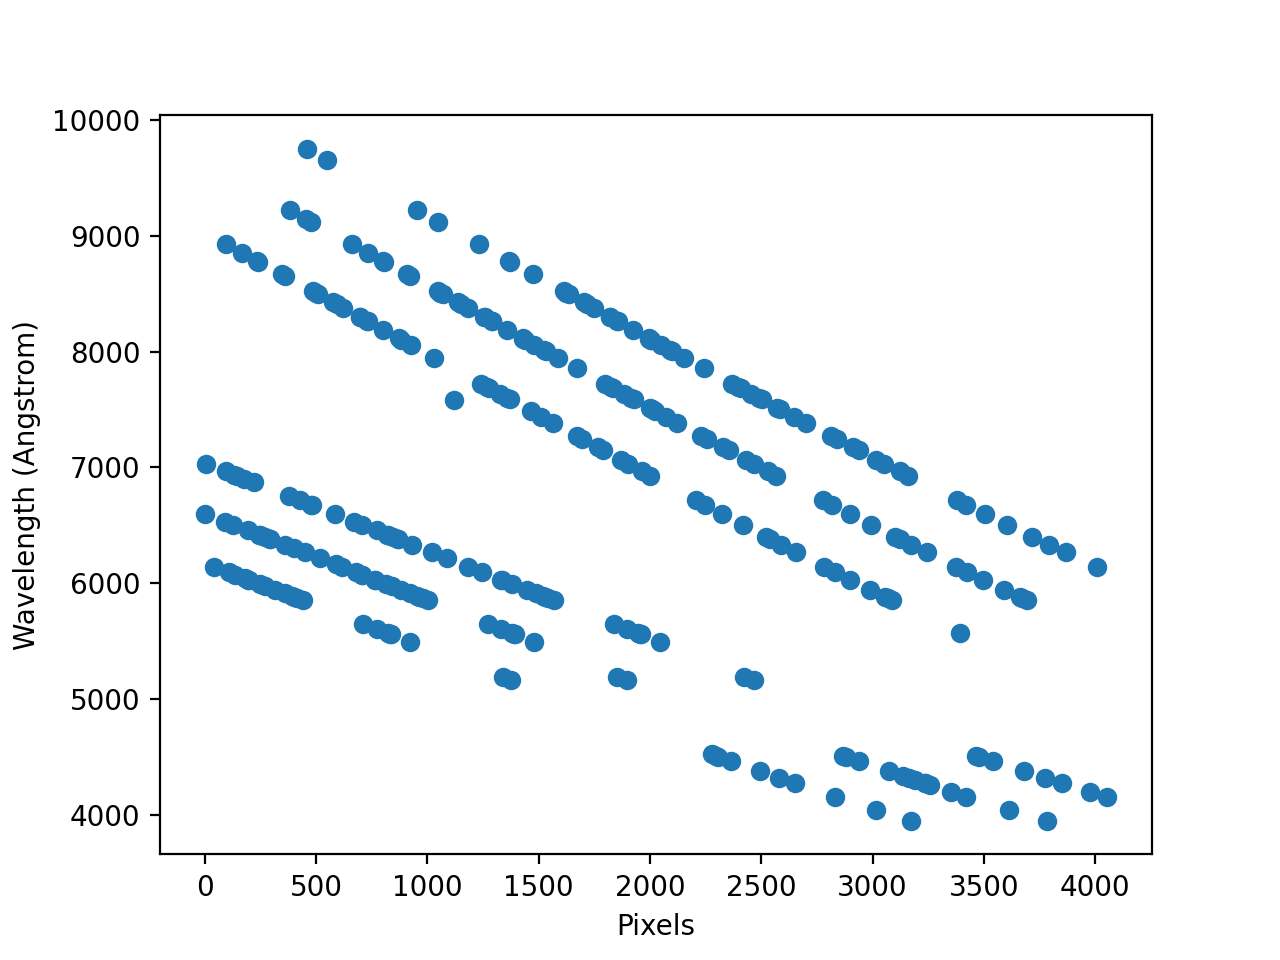

Text(0, 0.5, 'Wavelength (Angstrom)')

In [160]:
plt.plot(xpl_big, wav_big,marker='o',linestyle='none')
plt.xlabel('Pixels')
plt.ylabel('Wavelength (Angstrom)')

In [162]:
# there's a bad point...
good = np.where((np.abs(xpl_big-1118.66) > 1) & (np.abs(wav_big - 7585)>1))[0]

lamp = lamp[good]
disp = disp[good]
slit = slit[good]

wav_big = wav_big[good]
xpl_big = xpl_big[good]

<IPython.core.display.Javascript object>


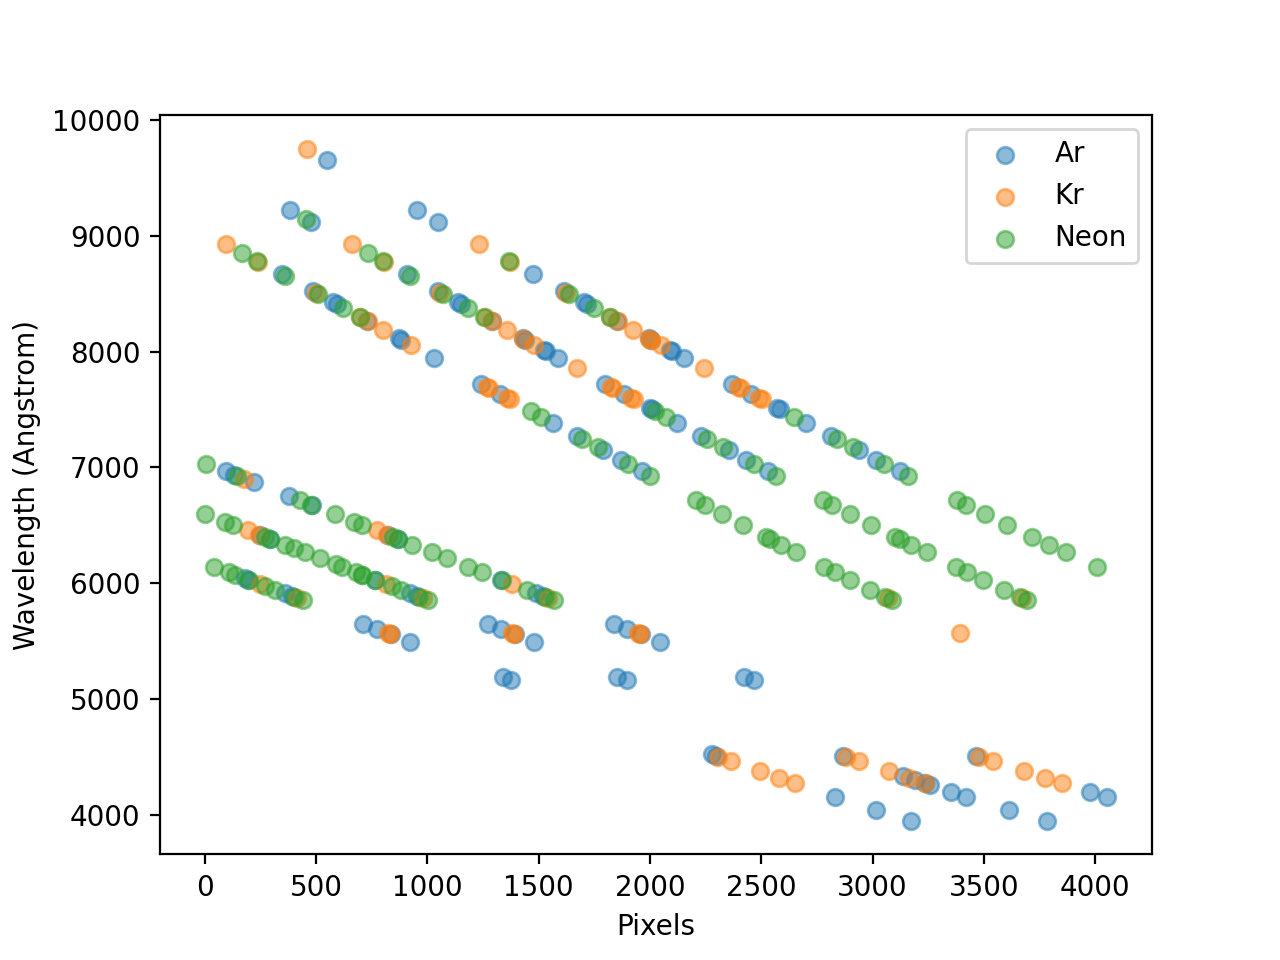

In [166]:
for k in np.unique(lamp):
    lm = lamp==k
    plt.scatter(xpl_big[lm], wav_big[lm], label=k, alpha=0.5)
plt.xlabel('Pixels')
plt.ylabel('Wavelength (Angstrom)')
plt.legend(fontsize=10)

In [ ]:
df = pd.DataFrame(data={'lamp':lamp, 
                        'disp':disp, 
                        'slit':slit, 
                        'pixel':xpl_big, 
                        'wave':wav_big})

df['slit'][81:89] = '2.0-low' # i mis-labled several things while tired... blah
df['disp'][81:89] = 'Blue'
df['slit'][89:115] = '2.0-low' 

df['slit'] = df['slit'].str.lower() # make everything lowercase


In [212]:
df['slit'][81:89]

81    2.0-low
82    2.0-low
83    2.0-low
84    2.0-low
85    2.0-low
86    2.0-low
87    2.0-low
88    2.0-low
Name: slit, dtype: object

In [222]:
# Ar red low -> Ar ctr
# df.iloc[149:169]
df['disp'][149:169] = 'Blue'
df['slit'][149:169] = '1.18-ctr'

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_22857/1372498638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disp'][149:169] = 'Blue'
/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_22857/1372498638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slit'][149:169] = '1.18-ctr'


In [223]:
df.iloc[149:169]

,Unnamed: 0,lamp,disp,slit,pixel,wave
149,149,Ar,Blue,1.18-ctr,3781.781571,3948.97
150,150,Ar,Blue,1.18-ctr,3613.753597,4044.42
151,151,Ar,Blue,1.18-ctr,3421.122173,4158.59
152,152,Ar,Blue,1.18-ctr,3352.490662,4200.67
153,153,Ar,Blue,1.18-ctr,3256.961979,4259.36
154,154,Ar,Blue,1.18-ctr,3236.447760,4272.17
155,155,Ar,Blue,1.18-ctr,3192.002475,4300.10
156,156,Ar,Blue,1.18-ctr,3138.466644,4333.56
157,157,Ar,Blue,1.18-ctr,2866.365235,4510.73
158,158,Ar,Blue,1.18-ctr,1898.312346,5162.29


In [224]:
# write the output file
df.to_csv('../templates/NeKrAr_lines.csv', index=False, index_label=False)

In [220]:
df = pd.read_csv('../templates/NeKrAr_lines.csv')

In [187]:
df

,Unnamed: 0,lamp,disp,slit,pixel,wave
0,0,Neon,Red,0.86-high,1369.265747,8780.62
1,1,Neon,Red,0.86-high,1636.696512,8495.36
2,2,Neon,Red,0.86-high,1747.370769,8377.61
3,3,Neon,Red,0.86-high,1820.086570,8300.33
4,4,Neon,Red,0.86-high,2647.022636,7438.90
...,...,...,...,...,...,...
296,296,Kr,Blue,1.18-ctr,2879.017179,4502.35
297,297,Kr,Blue,1.18-ctr,2937.709379,4463.69
298,298,Kr,Blue,1.18-ctr,3072.538605,4376.12
299,299,Kr,Blue,1.18-ctr,3161.353801,4319.58


In [ ]:
# red 1.18-ctr -> Blue 2.0-low
[5852.49, 5881.9, 5944.83, 6143.06, 6096.16, 6074.34, 6030.0, 5975.53]
[440.782700153851, 400.90314107718336, 315.33248863817124, 44.261233416809965, 108.68816608489004, 138.55294627800336, 199.22019567168647, 273.53558762355317]

In [204]:
df.iloc[81:91]


/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_22857/3108616945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disp'][81:89] = 'Blue'


,Unnamed: 0,lamp,disp,slit,pixel,wave
81,81,Neon,Blue,2.0-low,440.782700,5852.49
82,82,Neon,Blue,2.0-low,400.903141,5881.90
83,83,Neon,Blue,2.0-low,315.332489,5944.83
84,84,Neon,Blue,2.0-low,44.261233,6143.06
85,85,Neon,Blue,2.0-low,108.688166,6096.16
86,86,Neon,Blue,2.0-low,138.552946,6074.34
87,87,Neon,Blue,2.0-low,199.220196,6030.00
88,88,Neon,Blue,2.0-low,273.535588,5975.53
89,89,Neon,Red,1.18-ctr,167.701966,8853.87
90,90,Neon,Red,1.18-ctr,237.879510,8780.62


In [208]:
# red 1.180-ctr -> red 2.0-low
# xpl = [167.7019663720257, 237.87950968228068, 359.54504475569206, 511.6711320113309, 623.8199481363374, 697.0745024439923, 1465.1711399343462, 1512.5945522160007, 1697.3616646421704, 1765.5335169159885, 1901.884322808501, 2001.1501745740638, 2208.2595571063953, 2246.3810237450484, 2324.5331359665806, 2416.285643636628, 2520.4790357806332, 2539.8148568473953, 2588.6724736477227, 2657.3725058129494, 2783.735559204517, 2832.0784229863934, 2900.72948923312, 2989.847099538143, 3056.278261108322, 3087.859663872213]
# wav = [8853.87, 8780.62, 8654.38, 8495.36, 8377.61, 8300.36, 7488.87, 7438.9, 7245.17, 7173.94, 7032.41, 6929.47, 6717.04, 6678.28, 6598.95, 6506.53, 6402.25, 6382.99, 6334.43, 6266.5, 6143.06, 6096.16, 6030.0, 5944.83, 5881.9, 5852.49]

df.iloc[89:115]


/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_22857/1516919590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slit'][89:115] = '2.0-low'


,Unnamed: 0,lamp,disp,slit,pixel,wave
89,89,Neon,Red,2.0-low,167.701966,8853.87
90,90,Neon,Red,2.0-low,237.879510,8780.62
91,91,Neon,Red,2.0-low,359.545045,8654.38
92,92,Neon,Red,2.0-low,511.671132,8495.36
93,93,Neon,Red,2.0-low,623.819948,8377.61
94,94,Neon,Red,2.0-low,697.074502,8300.36
95,95,Neon,Red,2.0-low,1465.171140,7488.87
96,96,Neon,Red,2.0-low,1512.594552,7438.90
97,97,Neon,Red,2.0-low,1697.361665,7245.17
98,98,Neon,Red,2.0-low,1765.533517,7173.94


In [210]:
2

2

<IPython.core.display.Javascript object>


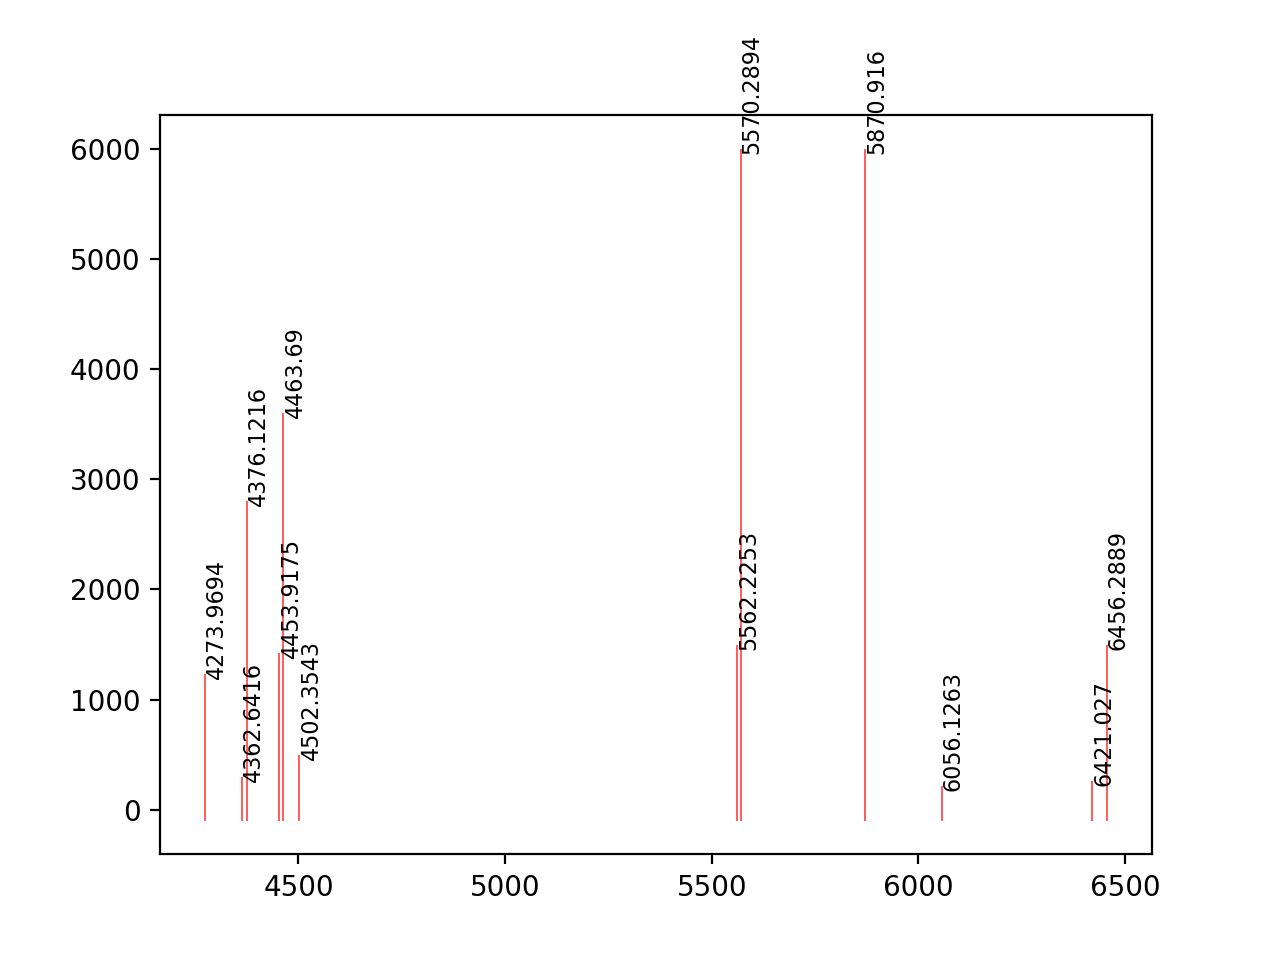

In [23]:
# from https://physics.nist.gov/PhysRefData/Handbook/Tables/kryptontable2.htm
# using HeNe as prelim calibration (quite good already)
KrI = [4273.9694, 4362.6416, 4376.1216, 4453.9175, 4463.6900, 4502.3543, 
       5562.2253, 5570.2894, 5870.9160, 6056.1263, 6421.0270, 6456.2889]

KrI_A = [1230, 300, 2800, 1420, 3600, 500, 1500, 6000, 6000, 220, 260, 1500]
for k in range(len(KrI)):
    plt.text(KrI[k], KrI_A[k], str(KrI[k]), fontsize=8, rotation='vertical', color='k')
plt.vlines(KrI, -100, KrI_A, color='r', lw=0.6, alpha=0.75)

